The Project deals with predicting the Sales Price of individual residential properties in Ames, Iowa.  

We have two datasets given, 'train.csv' and 'test.csv'. The goal is to build a model based on the parameters given in 'train.csv' and predict the Sales Price of a given a house in 'test.csv'   

The 'train.csv' has 1459 rows and 81 attributes including the Sales Price. Among the given attributes, 43 are categorical attributes and 36 are numerical attributes (excluding Id and SalePrice)


# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None) #to display total no of columns present in dataset
import warnings
warnings.filterwarnings('ignore')

## Loading The Data

In [2]:
def read_in_dataset(dset, verbose=False):
    
    """

    Keyword arguments:
    dset -- a string in {tain.csv,test.csv}
    verbose -- whether or not to print info about the dataset
    
    Returns:
    a pandas dataframe
    """
    
    df = pd.read_csv('{0}.csv'.format(dset))
    
    if verbose:
        print('\n{0:*^80}'.format(' Reading in the {0} dataset '.format(dset)))
        print("\nThe dataset has {0} rows and {1} columns".format(*df.shape))
        print('\n{0:*^80}\n'.format(' Dataset has the following columns '))
        print(df.columns)
        print('\n{0:*^80}\n'.format(' The first 5 rows look like this '))
        print(df.head())
    
    return df

## Read Training Data

In [3]:
data=read_in_dataset('train',verbose=True)


************************* Reading in the train dataset *************************

The dataset has 1460 rows and 81 columns

********************** Dataset has the following columns ***********************

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### drop Id from training data

In [5]:
data.drop(labels=['Id'],axis=1,inplace=True)

## Reading Test Data

In [6]:
test_data=read_in_dataset('test',verbose=True)


************************* Reading in the test dataset **************************

The dataset has 1459 rows and 80 columns

********************** Dataset has the following columns ***********************

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 

In [7]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Taking copy of ID from test data. The submission file format is (Id, Predicted SalePrice)

In [8]:
Id=test_data['Id']
test_data.drop(labels=['Id'],axis=1,inplace=True)

# Removing Trailing and Leading Spaces if any 

Sometimes CSV files might have spaces, that are not treated as NaN values in pandas, so to handle this we will remove any such trailing and leading spaces

In [9]:
def remove_trail_lead_space(data_file):
    data_file.replace('^\s+|\s+$','', regex=True,inplace=True)
    data_file.replace('',np.nan,inplace=True)
    return data_file

In [10]:
data=remove_trail_lead_space(data)
test_data=remove_trail_lead_space(test_data)

# Feature Engineering

### Checking SalePrice Distribution

In [11]:
def numerical_distribution(data_file,column,log=False):
    """

    Keyword arguments:
    data_file -- data frame for which we need the distribution
    column -- column for which distribution is required
    log -- If True then Log Transformed Distribution else Original Distribution
    
    Output:
    Distplot of corresponding distribution
    """
    
    if log:
        print("Log transformed Distribution of {0}".format(column))
        plt.figure(figsize=(10,5))
        sns.distplot(np.log10(data_file[column].dropna()))
    else:
        print("Distribution of {0}".format(column))
        plt.figure(figsize=(10,5))
        sns.distplot(data_file[column].dropna())

Distribution of SalePrice


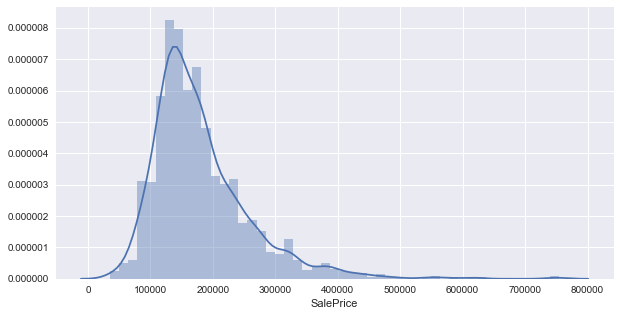

In [12]:
numerical_distribution(data,'SalePrice')

Log transformed Distribution of SalePrice


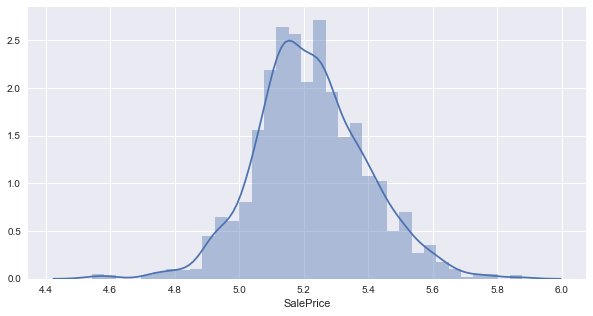

In [13]:
numerical_distribution(data,'SalePrice',True)

Sales Price is right skewed , hence we need to take log transformation if we use Linear Models

## Missing Data

#### We will check the missing data for both training and test data simultaneously 

In [14]:
def missing_data_plot(data_file,width=10,height=10):
    """

    Keyword arguments:
    data_file -- data frame for which we need to plot the missing data plot
    width -- figure width (horizontal)
    height -- figure height (vertical)

    
    Output:
    Plots a barchart with coloumns and corresponding percentage of missing values 
    """
    missing_data=data_file.isnull().mean()
    missing_data.sort_values(ascending=False,inplace=True)
    missing_data=missing_data[missing_data>0]
    if (len(missing_data)!=0):
        plt.figure(figsize=(width,height))
        sns.barplot(x=missing_data.values,y=missing_data.index)
    else:
        print('No missing data')

#### Missing Data in Training Dataset

Text(0.5,1,'Training Data')

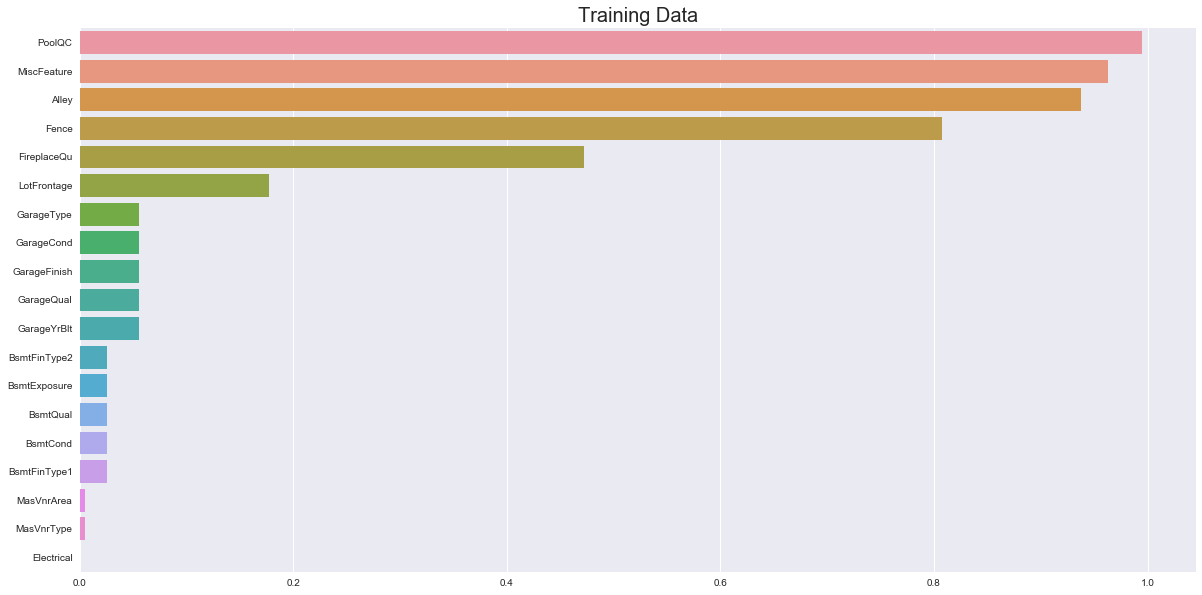

In [15]:
missing_data_plot(data,20,10)
plt.title("Training Data",{'fontsize':20})

#### Missing Data in Test Dataset

Text(0.5,1,'Test Data')

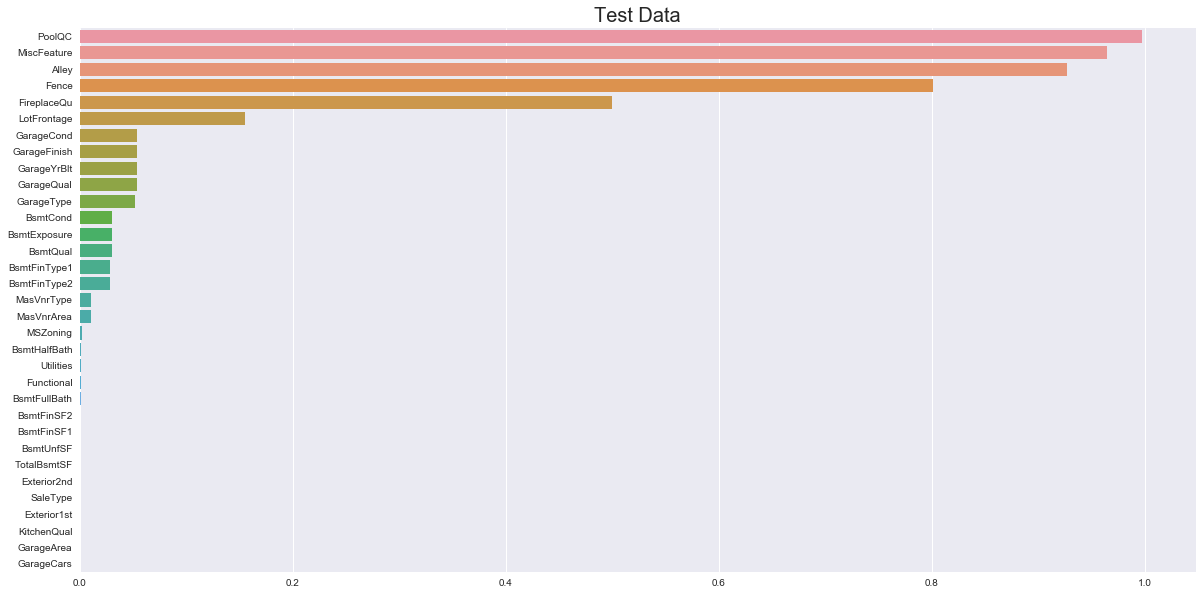

In [16]:
missing_data_plot(test_data,20,10)
plt.title("Test Data",{'fontsize':20})

#### As we know from the data description, most of the columns above have 'NA' as a valid value, like PoolQC. Here, we will try to differentiate between columns that have NA as valid input and the columns that have actual missing values.

## Function to Change NA to None values

In [17]:
def Change_To_None(data_file,columns):
    """

    Keyword arguments:
    data_file -- data frame for which we need the to conver NA labels
    columns-- feature for which NA labels has to be converted to 'None' value
    
    Returns-- Data Frame with correspomding labels converted to None
     """
    for column in columns:
        data_file[column] = data_file[column].fillna("None")
    return data_file

Based on data description  
[PoolQC , MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond,BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2] "NA" means "No access". Hence for these fields we will replace NA by None

In [18]:
none_columns=['PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 
              'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
data=Change_To_None(data,none_columns)
test_data=Change_To_None(test_data,none_columns)

After converting to None, let us check the missing values now

Text(0.5,1,'Training Data')

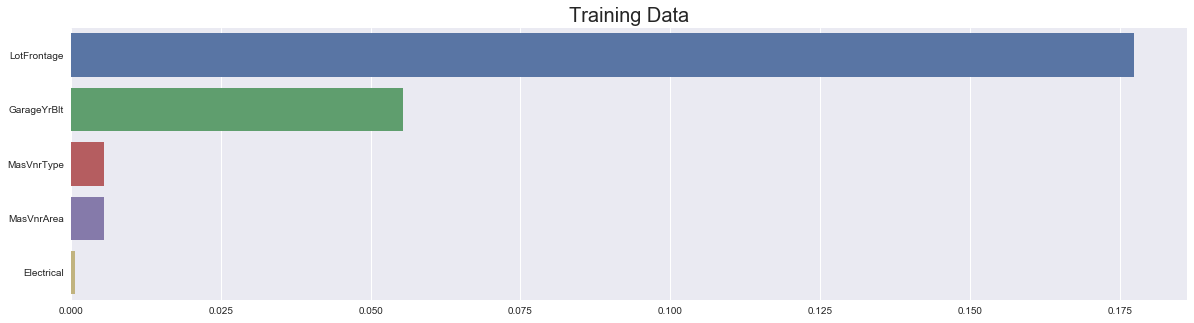

In [19]:
missing_data_plot(data,20,5)
plt.title("Training Data",{'fontsize':20})

Text(0.5,1,'Test Data')

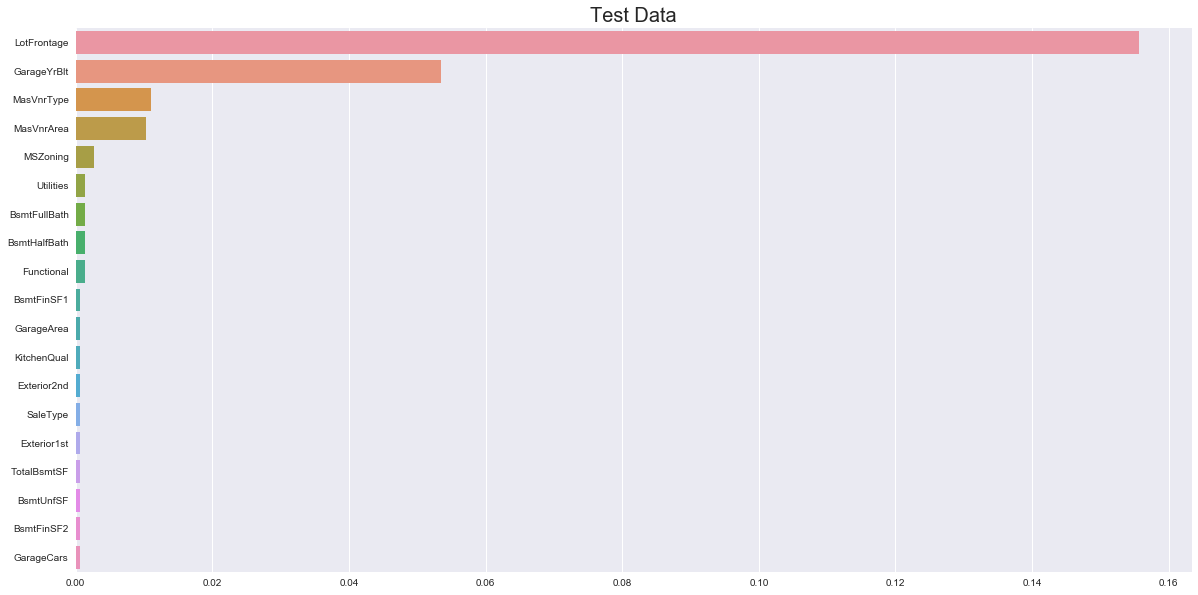

In [20]:
missing_data_plot(test_data,20,10)
plt.title("Test Data",{'fontsize':20})

#### LotFrontage

Distribution of LotFrontage


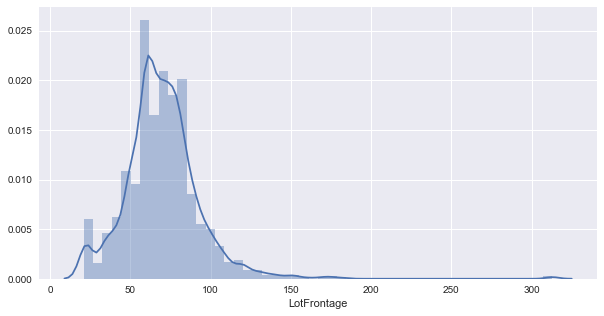

In [21]:
numerical_distribution(data,'LotFrontage')

Percentage missing value for LotFrontage is less then 10%. The area of each street connected to the house will most likely have a similar area to other houses in its neighborhood. Hence we will replace missing values in LotFrontage by the median LotFrontage of neighbourhood

In [22]:
def group_median_imputation(file_to_be_transformed,data_file,columns,group):
    """

    Keyword arguments:
    file_to_be_transformed -- file that has to be transformed
    data_file -- file using which file_to_be_transformed has to be fit
    columns -- columns that has to be transformed
    Group -- using which group the median has to be computed
    
    Returns:
    a pandas dataframe
    """
    for column in columns:
        file_to_be_transformed[column]=data_file.groupby([group])[column].apply(lambda x: x.fillna(x.median()))
    return file_to_be_transformed
    

In [23]:
columns=['LotFrontage']
data= group_median_imputation(data,data,columns,'Neighborhood')
test_data=group_median_imputation(test_data,data,columns,'Neighborhood')# Test data will be replaced by median of train data

Text(0.5,1,'Training Data')

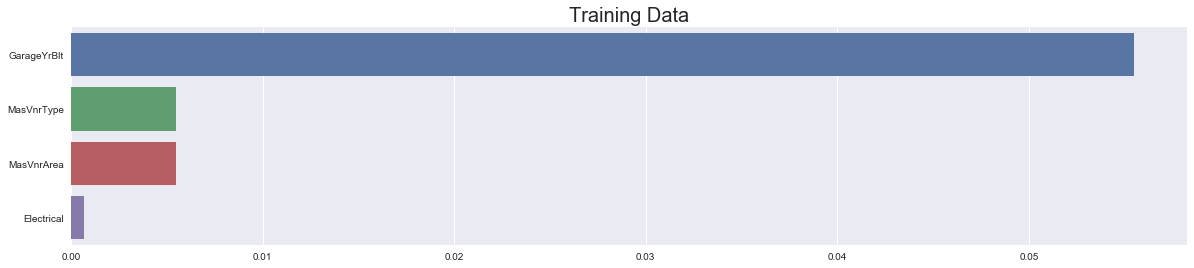

In [24]:
missing_data_plot(data,20,4)
plt.title("Training Data",{'fontsize':20})

Text(0.5,1,'Test Data')

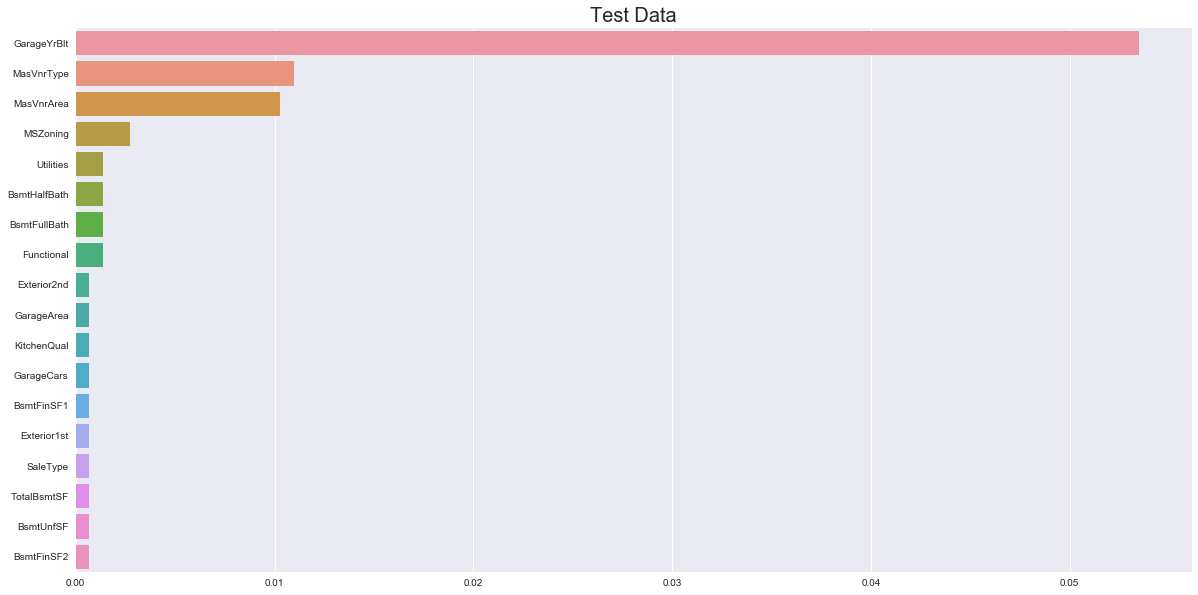

In [25]:
missing_data_plot(test_data,20,10)
plt.title("Test Data",{'fontsize':20})

#### GarageYrBlt

In [26]:
data[data['GarageYrBlt'].isnull()][['GarageType', 'GarageFinish', 'GarageQual','GarageCond','GarageYrBlt']].head(10)

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt
39,None,None,None,None,NaN
48,None,None,None,None,NaN
78,None,None,None,None,NaN
88,None,None,None,None,NaN
89,None,None,None,None,NaN
99,None,None,None,None,NaN
108,None,None,None,None,NaN
125,None,None,None,None,NaN
127,None,None,None,None,NaN
140,None,None,None,None,NaN


In [27]:
test_data[test_data['GarageYrBlt'].isnull()][['GarageType', 'GarageFinish', 'GarageQual','GarageCond','GarageYrBlt']].head(10)

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt
53,None,None,None,None,NaN
71,None,None,None,None,NaN
79,None,None,None,None,NaN
92,None,None,None,None,NaN
96,None,None,None,None,NaN
98,None,None,None,None,NaN
100,None,None,None,None,NaN
130,None,None,None,None,NaN
133,None,None,None,None,NaN
134,None,None,None,None,NaN


"GarageYrBlt" missing value is corresponding to places where there is no Garage access, we will replace this column by 0.

In [28]:
def impute_zero(data_file,columns):
    """

    Keyword arguments:
    data_file -- data frame for which we need to impute Zero 
    columns-- feature for which missing values to be replaced by 0
    
    Returns-- Data Frame imputed with zero for corresponding columns
    """
    for column in columns:
        data_file[column] = data_file[column].fillna(0)
    return data_file

In [29]:
columns=['GarageYrBlt']
data=impute_zero(data,columns)
test_data=impute_zero(test_data,columns)

Text(0.5,1,'Training Data')

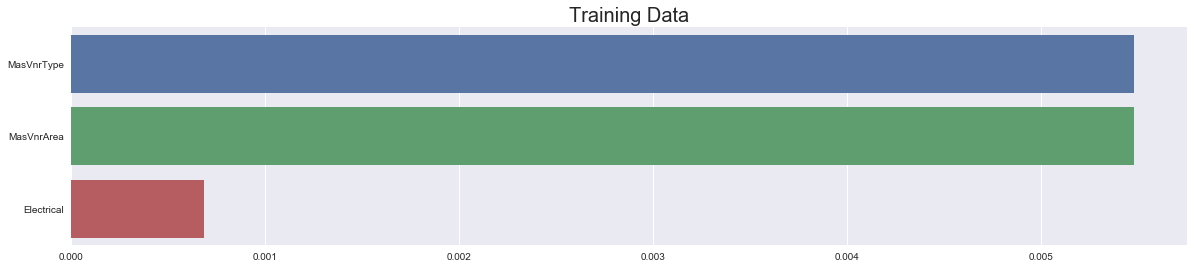

In [30]:
missing_data_plot(data,20,4)
plt.title("Training Data",{'fontsize':20})

Text(0.5,1,'Test Data')

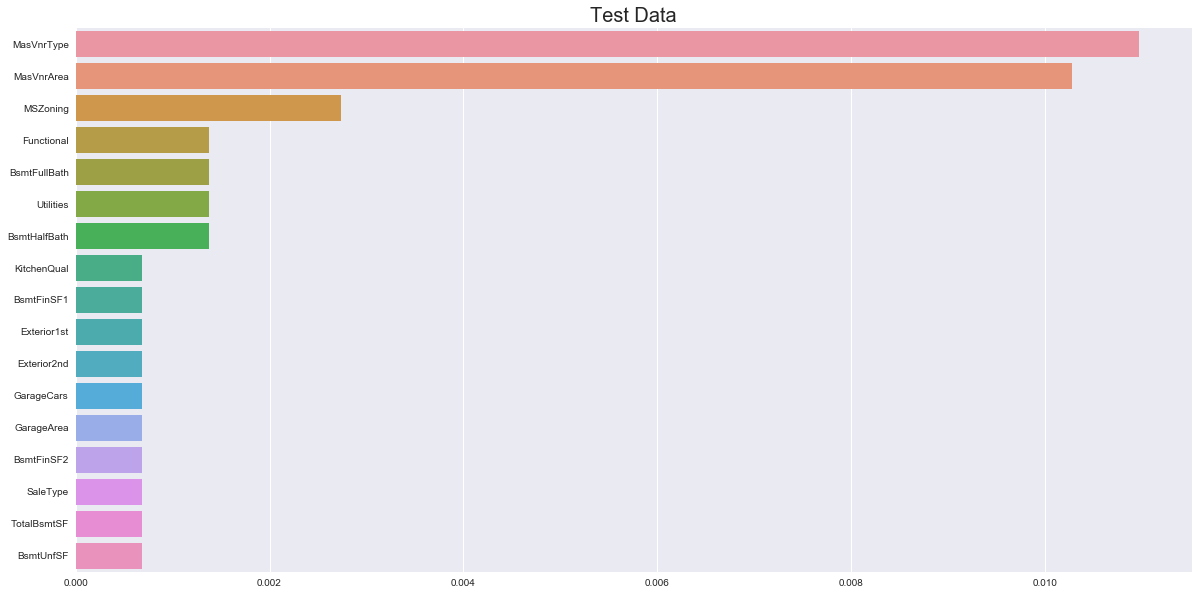

In [31]:
missing_data_plot(test_data,20,10)
plt.title("Test Data",{'fontsize':20})

#### MasVnrType and MasVnrArea

Based on Data Description , for 'MasVnrType', 'None' corresponds to no Masonry. Hence NA here is actual missing value

Distribution of MasVnrArea


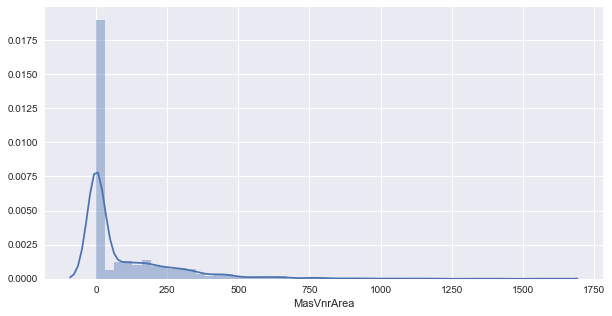

In [32]:
numerical_distribution(data,'MasVnrArea')

In [33]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

'MasVnrType' is a categorical column, hence we will impute by mode.  
'MasVnrArea' is skewed , hence we will impute by median

In [34]:
def median_imputation(file_to_be_transformed,data_file,columns):
    """

    Keyword arguments:
    file_to_be_transformed -- file that has to be transformed
    data_file -- file using which file_to_be_transformed has to be fit
    columns -- columns that has to be transformed
    
    
    Returns:
    a pandas dataframe where corresponding columns where imputed by median
    """
    for column in columns:
        file_to_be_transformed[column]=np.median(data_file[column].dropna())
    return file_to_be_transformed

In [35]:
def impute_mode(file_to_be_transformed,data_file,columns):
    """

    Keyword arguments:
    file_to_be_transformed -- file that has to be transformed
    data_file -- file using which file_to_be_transformed has to be fit
    columns -- columns that has to be transformed
    
    Returns:
    a pandas dataframe where corresponding columns where imputed by mode
    """
    for column in columns:
        most_frequent_category = data_file.groupby([column])[column].count().sort_values(ascending=False).index[0]
        file_to_be_transformed[column].fillna(most_frequent_category, inplace=True)
    return file_to_be_transformed
    

In [36]:
columns=['MasVnrType']
data=impute_mode(data,data,columns)
test_data =impute_mode(test_data,data,columns)

In [37]:
columns=['MasVnrArea']
data=median_imputation(data,data,columns)
test_data =median_imputation(test_data,data,columns)

Text(0.5,1,'Training Data')

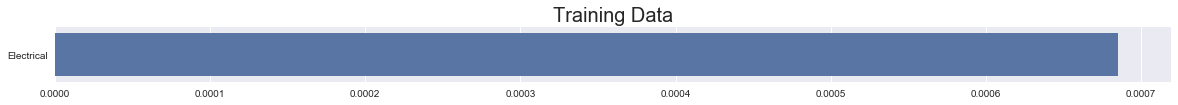

In [38]:
missing_data_plot(data,20,1)
plt.title("Training Data",{'fontsize':20})

Text(0.5,1,'Test Data')

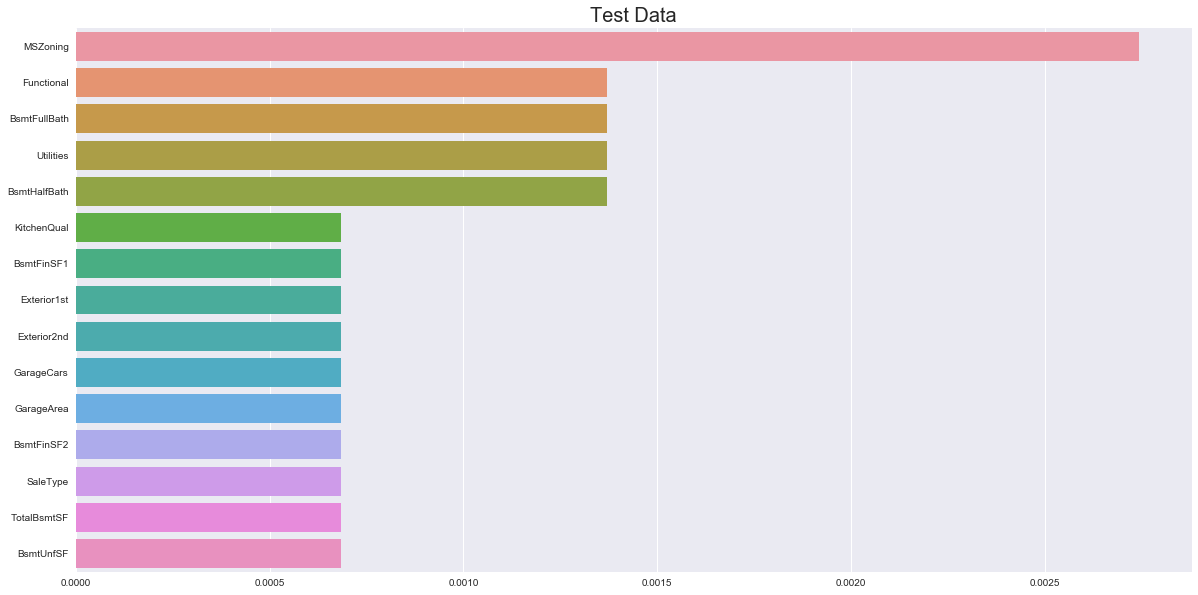

In [39]:
missing_data_plot(test_data,20,10)
plt.title("Test Data",{'fontsize':20})

#### Electrical 

In [40]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Since Electrical is a categorical column, We will replace Electrical with mode value (Most repeated)

In [41]:
columns=['Electrical']
data=impute_mode(data,data,columns)

In [42]:
missing_data_plot(data)

No missing data


Text(0.5,1,'Test Data')

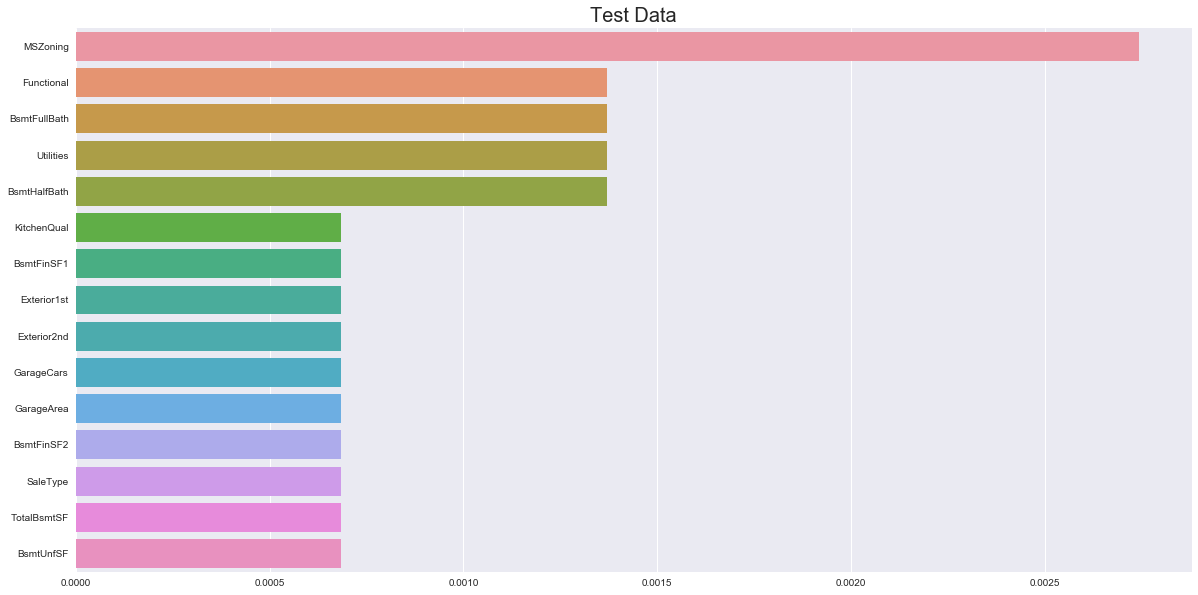

In [43]:
missing_data_plot(test_data,20,10)
plt.title("Test Data",{'fontsize':20})

In [44]:
def get_missing_columns(data_file):
    """ 
    Return column names which has missing values
    """
    missing_data=data_file.isnull().mean()
    missing_data.sort_values(ascending=False,inplace=True)
    missing_data=missing_data[missing_data>0]
    return missing_data.index

In [45]:
missing_columns=get_missing_columns(test_data)
missing_columns

Index(['MSZoning', 'Functional', 'BsmtFullBath', 'Utilities', 'BsmtHalfBath',
       'KitchenQual', 'BsmtFinSF1', 'Exterior1st', 'Exterior2nd', 'GarageCars',
       'GarageArea', 'BsmtFinSF2', 'SaleType', 'TotalBsmtSF', 'BsmtUnfSF'],
      dtype='object')

In [46]:
test_data[missing_columns].head()

,MSZoning,Functional,BsmtFullBath,Utilities,BsmtHalfBath,KitchenQual,BsmtFinSF1,Exterior1st,Exterior2nd,GarageCars,GarageArea,BsmtFinSF2,SaleType,TotalBsmtSF,BsmtUnfSF
0,RH,Typ,0.0,AllPub,0.0,TA,468.0,VinylSd,VinylSd,1.0,730.0,144.0,WD,882.0,270.0
1,RL,Typ,0.0,AllPub,0.0,Gd,923.0,Wd Sdng,Wd Sdng,1.0,312.0,0.0,WD,1329.0,406.0
2,RL,Typ,0.0,AllPub,0.0,TA,791.0,VinylSd,VinylSd,2.0,482.0,0.0,WD,928.0,137.0
3,RL,Typ,0.0,AllPub,0.0,Gd,602.0,VinylSd,VinylSd,2.0,470.0,0.0,WD,926.0,324.0
4,RL,Typ,0.0,AllPub,0.0,Gd,263.0,HdBoard,HdBoard,2.0,506.0,0.0,WD,1280.0,1017.0


'MSZoning', 'Functional','Utilities','SaleType','Exterior1st','Exterior2nd','KitchenQual', are all categorical columns. We will replace these missing value with mode of their correspomding columns from training data

Text(0.5,1,'Test Data')

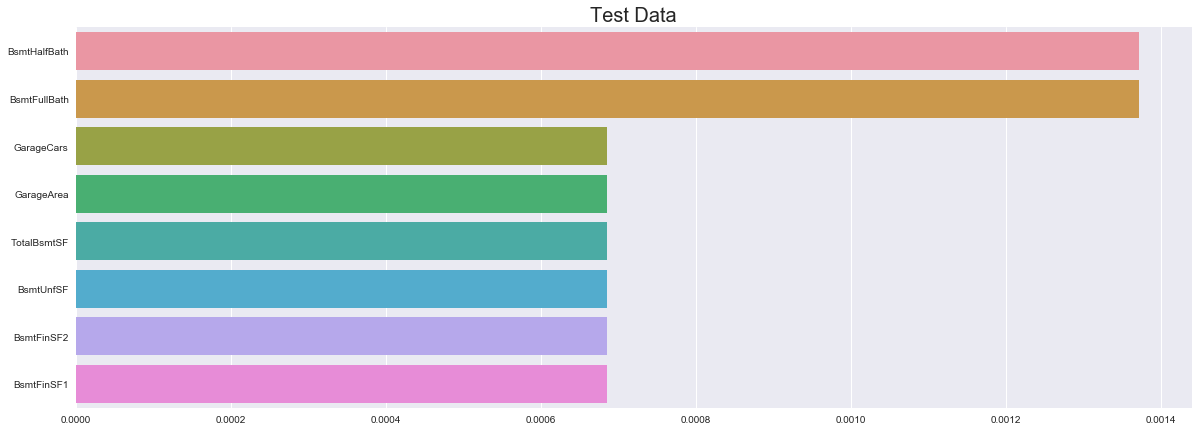

In [47]:
columns=['MSZoning', 'Functional','Utilities','SaleType','Exterior1st','Exterior2nd','KitchenQual']
test_data=impute_mode(test_data,data,columns)
missing_data_plot(test_data,20,7)
plt.title("Test Data",{'fontsize':20})

In [48]:
test_data[get_missing_columns(test_data)].head()

,BsmtHalfBath,BsmtFullBath,GarageCars,GarageArea,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1
0,0.0,0.0,1.0,730.0,882.0,270.0,144.0,468.0
1,0.0,0.0,1.0,312.0,1329.0,406.0,0.0,923.0
2,0.0,0.0,2.0,482.0,928.0,137.0,0.0,791.0
3,0.0,0.0,2.0,470.0,926.0,324.0,0.0,602.0
4,0.0,0.0,2.0,506.0,1280.0,1017.0,0.0,263.0


For BsmtFullBath,BsmtHalfBath,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFinSF1, "NA" means no Basement access. Hence the corresponding area where there is no access will be replaced by 0.  
Garage Cars and Garage Area , "NA" means No garage acess. We will replace it by 0 suggesting when there is no garage i.e. Garage Area will be 0 and also suggesting size of garage in terms of car capacity is also 0


In [49]:
columns=get_missing_columns(test_data)
test_data=impute_zero(test_data,columns)
missing_data_plot(test_data)

No missing data


#### Check if all Missing data  has been handled

In [50]:
assert all(data.isna().sum() == 0)

In [51]:
assert all(test_data.isna().sum() == 0)

In [52]:
print('Train Data shape:',data.shape)
print('Test Data shape: ',test_data.shape)

Train Data shape: (1460, 80)
Test Data shape:  (1459, 79)


In [53]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


There are few numerical attributes that are actually categorical.  
Example: 'MSSubClass', 'OverallQual','OverallCond','MoSold','YrSold' etc.  
Such columns are converted to categories

In [54]:
def convert_to_categorical(data_file,columns):
    """ Convert Categorical Columns which are represented as numerical to Categorical"""
    for column in columns:
        data_file[column] = data_file[column].apply(str)
    return data_file

In [55]:
columns=['MSSubClass', 'OverallQual','OverallCond','MoSold','YrSold']
data=convert_to_categorical(data,columns)
test_data=convert_to_categorical(test_data,columns)

In [56]:
data.select_dtypes(include='O').shape

(1460, 48)

In [57]:
test_data.select_dtypes(include='O').shape

(1459, 48)

#### Handling unequal number of categories for any given column in both train and test data

In [58]:
categorical_columns = list(data.select_dtypes(include=['O']).columns.values)
for column in categorical_columns:
    categories = np.union1d(data[column], test_data[column])
    data[column] = data[column].astype('category', categories = categories)
    test_data[column] = test_data[column].astype('category', categories = categories)

## Exploratory Data Analysis

We need a way to handle categorical data so that we can give them as inputs to any machine learning model.We can either perform a label encoding or convert categories to dummy variables. If we have ordinal categories, it is a good idea to perform label encoding and if nominal then we can convert these features to dummy variables

Below we will perform bivariate analysis (Category vs SalesPrice) and check if there is any sort of ordering between them

#### Bivariate Analysis 

In [59]:
def boxplot(data,x_columns,y_column):
    """
    creates a boxplot with different categories of x_columns on x-axis and
    y_column corresponding to category on y-axis 
    """
    for column in columns:
        plt.figure(figsize=(20,8))
        sns.boxplot(x=column, y=y_column, data=data,palette='rainbow')
        
        

In [60]:

data[categorical_columns].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,12,2008,WD,Normal


####  MSZoning and MSSubClass

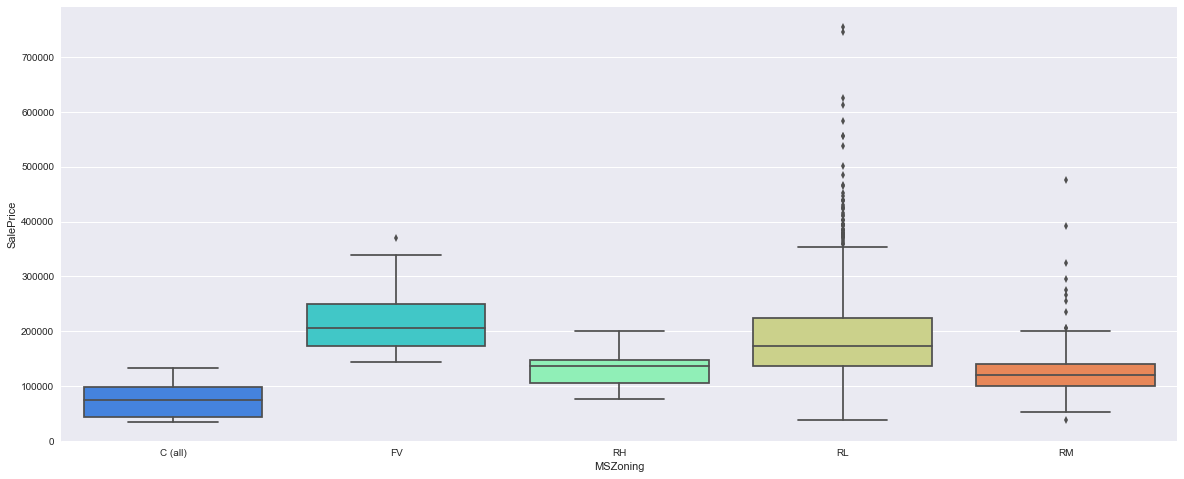

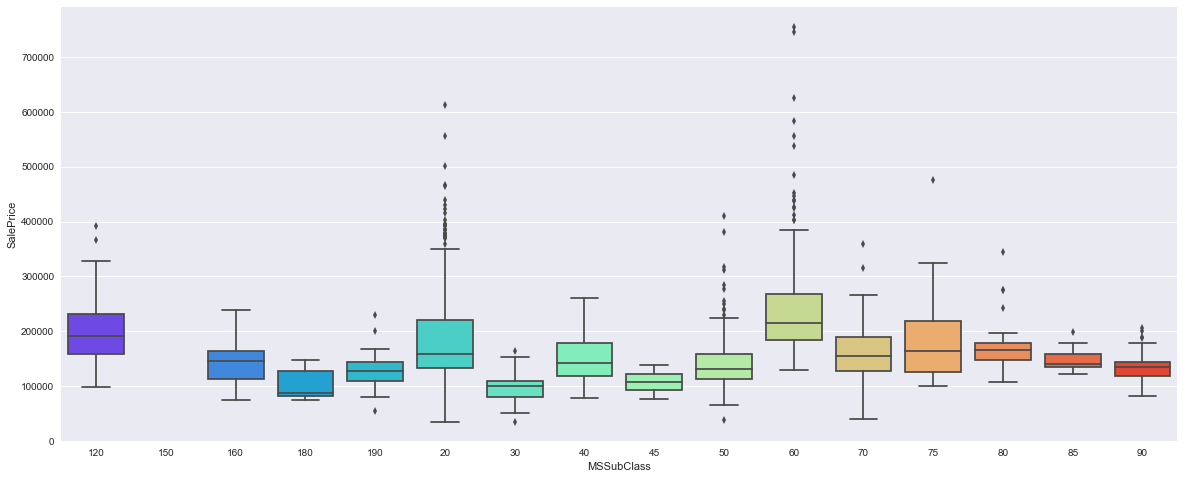

In [61]:
columns=['MSZoning','MSSubClass']
boxplot(data,columns,data['SalePrice'])

MSZoning has similar boxplot for 2 categories, so we dont have convincing evidence to say if it is ordinal.   
MSSubClass has some ordering in chunks but not as a whole, we will convert this into dummy variables.
Hence we will convert this column to dummy variables

In [62]:
label_encoding=[]
dummy_variables=['MSZoning','MSSubClass']

##### Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope

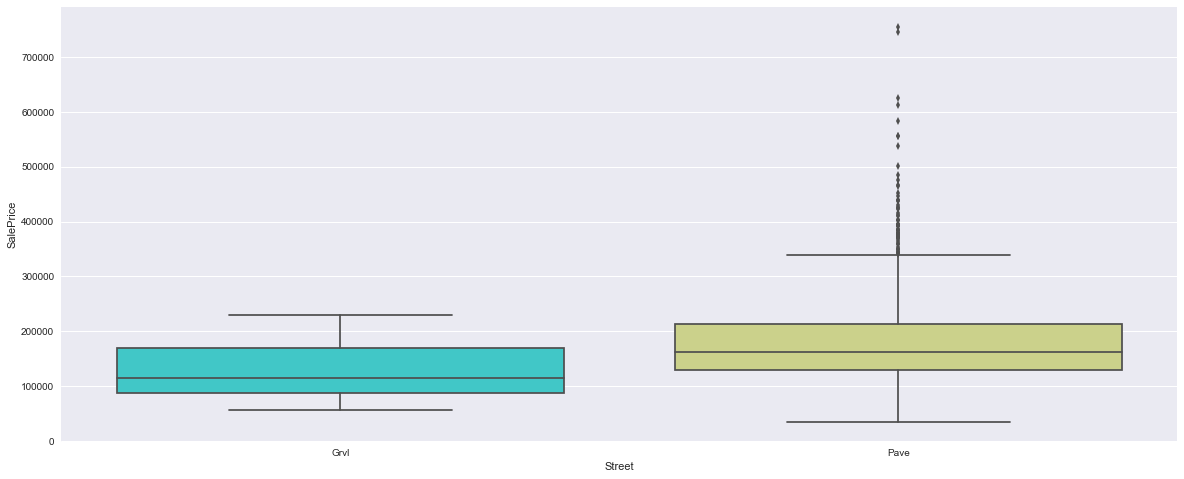

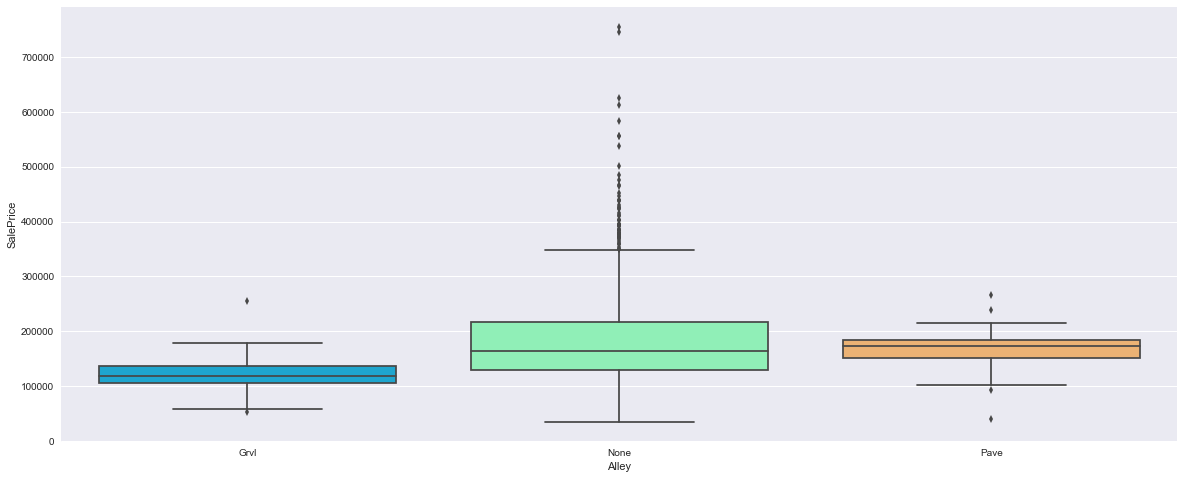

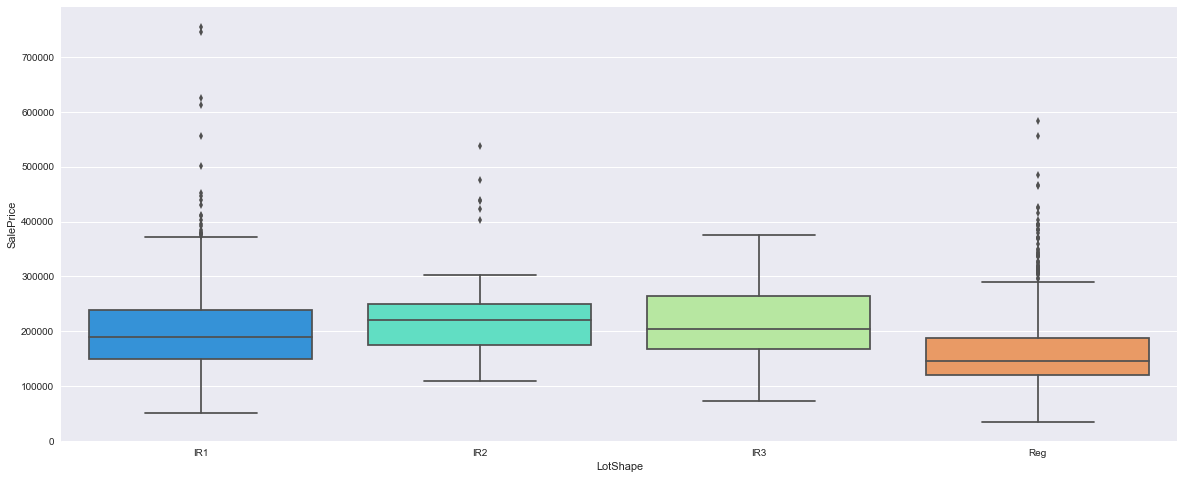

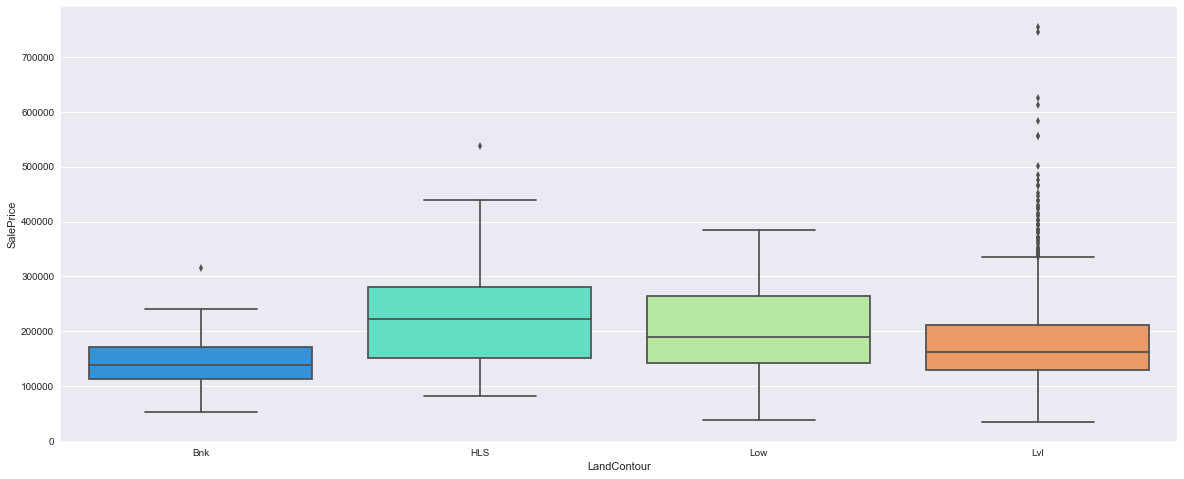

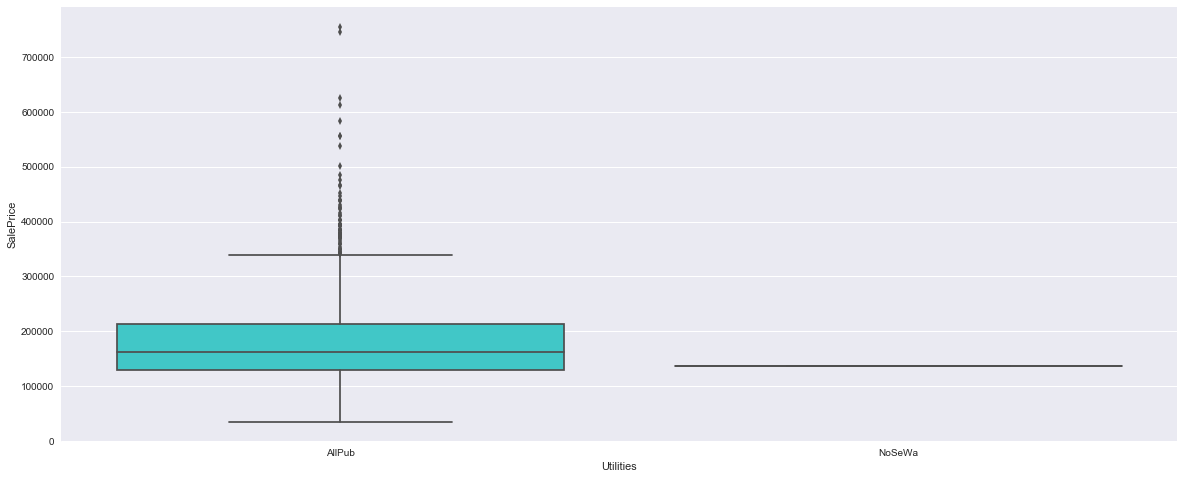

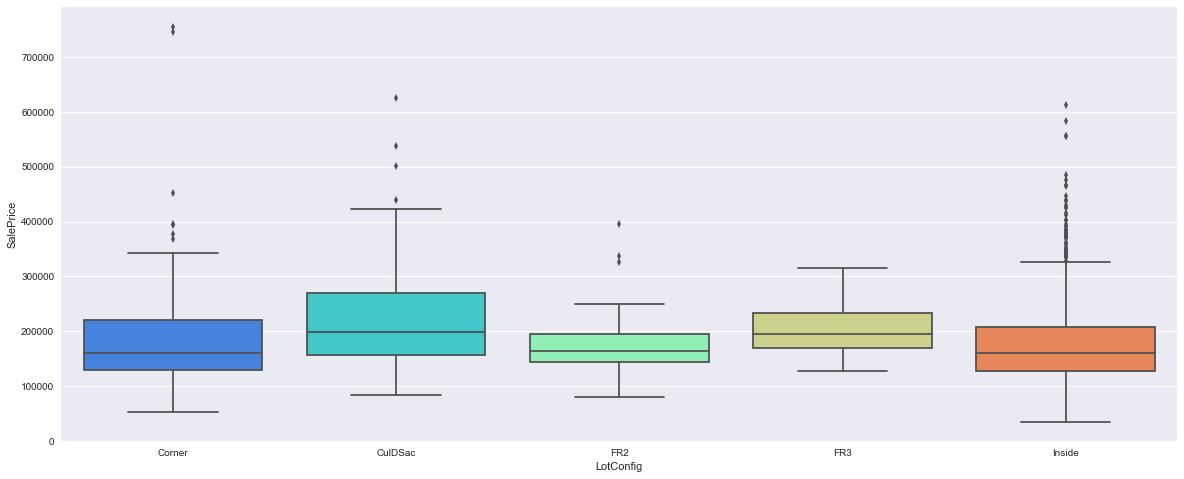

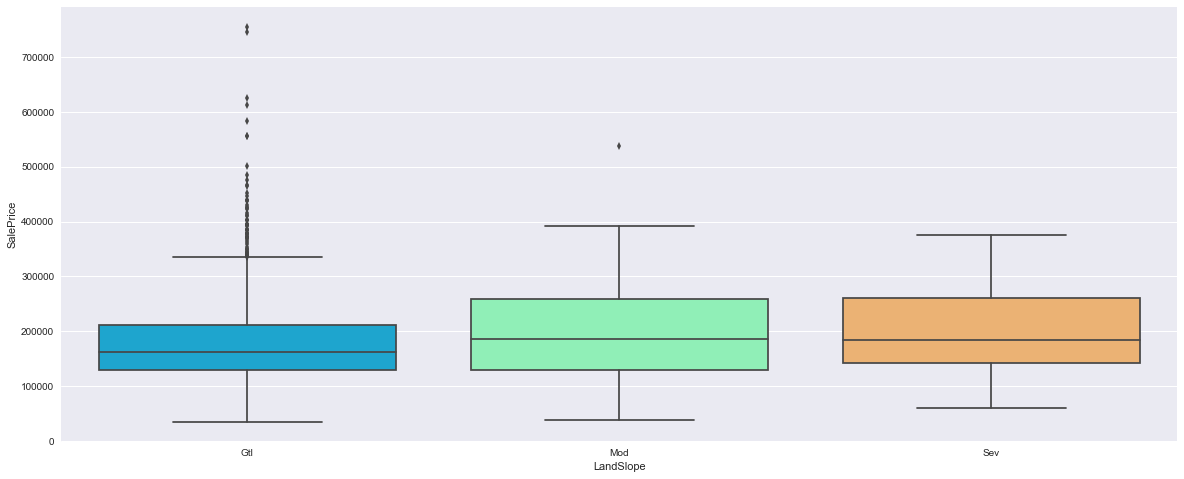

In [63]:
columns=['Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope']
boxplot(data,columns,data['SalePrice'])

From boxplot,  
Street and Alley suggest some kind of ordering, hence we will perform label encoding on these attributes.  
LotShape, LandSlope ,LandContour and LotConfig have similar plot for few categories,so we dont have convincing evidence to say if it is ordinal, hence we will convert these attributes to dummy variables.  
For Utilities there is hardly any data in on of the categories.Hence we cannot conclude if the category is ordinal. So we chose to convert it into dummy variables

In [64]:
label_encoding.extend(['Street','Alley'])
dummy_variables.extend(['LandContour','LotConfig','LotShape','LandSlope','Utilities'])

#### Neighborhood

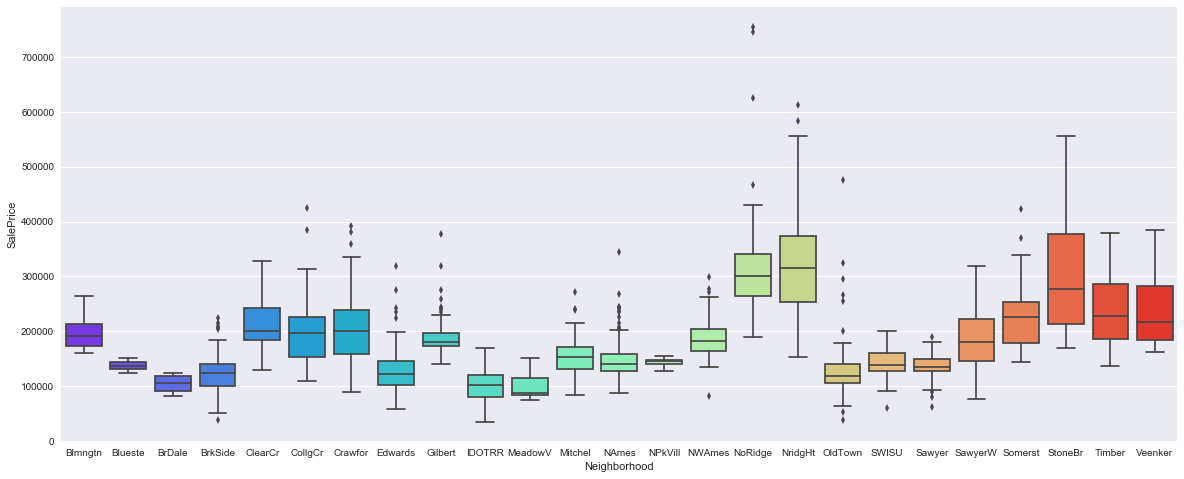

In [65]:
columns=['Neighborhood']
boxplot(data,columns,data['SalePrice'])

Neighborhood looks ordinal in chunks. But there are few different categories for which boxplot are similar and hence we will convert Neighborhood to dummy variables

In [66]:
dummy_variables.extend(['Neighborhood'])

#### Condition1 and Condition2

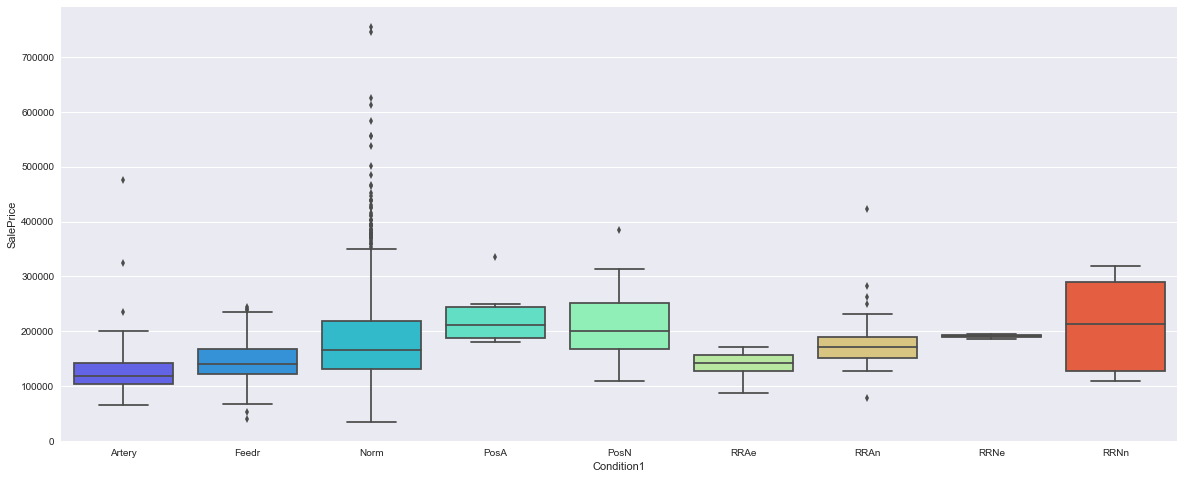

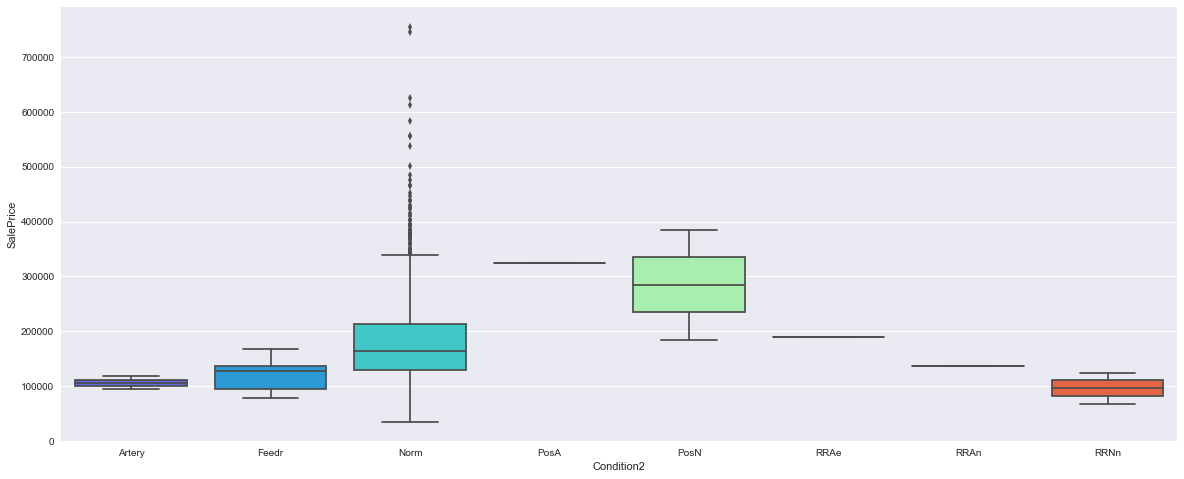

In [67]:
columns=['Condition1','Condition2']
boxplot(data,columns,data['SalePrice'])

Condition1 does not show evidence for ordinal category. Hence we will convert this column to dummy variables.  
Condition2 on other hand shows some kind of ordering , but there are few labels with very less data.Hence we cannot conclude the data has some kind of ordering. We will convert this to dummy variables.

In [68]:
dummy_variables.extend(['Condition1','Condition2'])

#### BldgType and HouseStyle

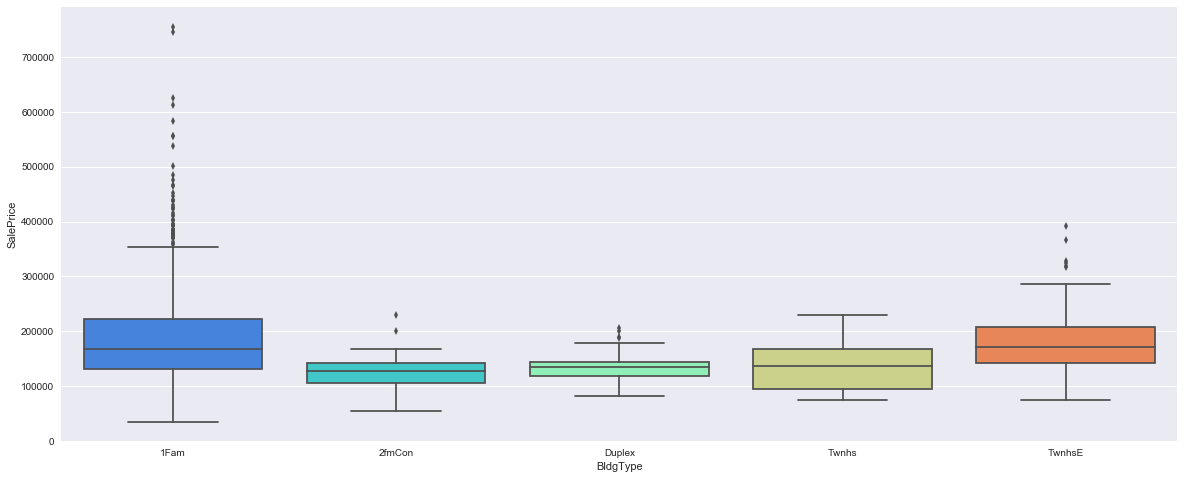

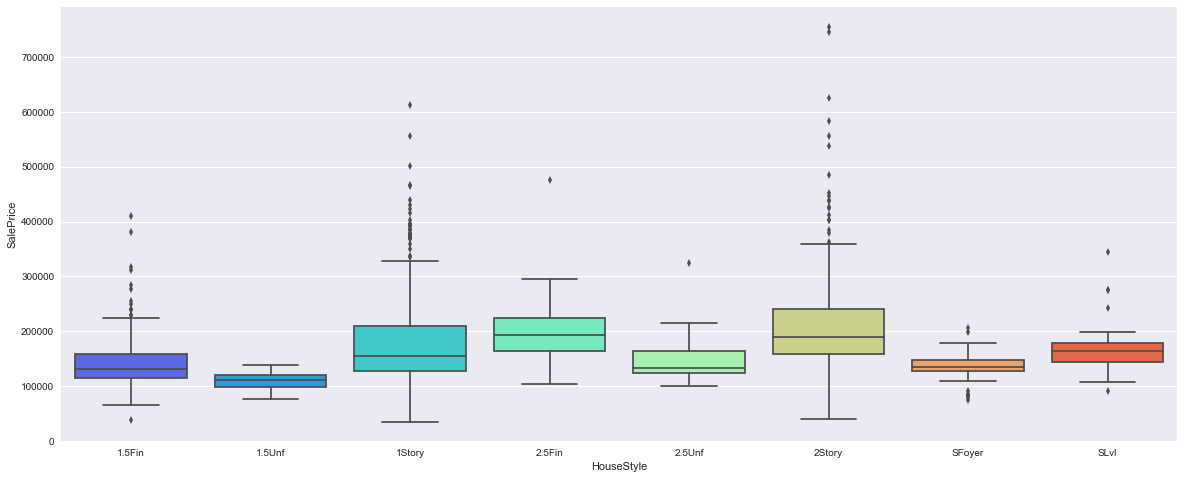

In [69]:
columns=['BldgType','HouseStyle']
boxplot(data,columns,data['SalePrice'])

Based on boxplot both BldgType and HouseStyle do not show evidence of distinct ordering. Hence we will convert these columns to dummy variables

In [70]:
dummy_variables.extend(['BldgType','HouseStyle'])


#### RoofStyle and RoofMatl

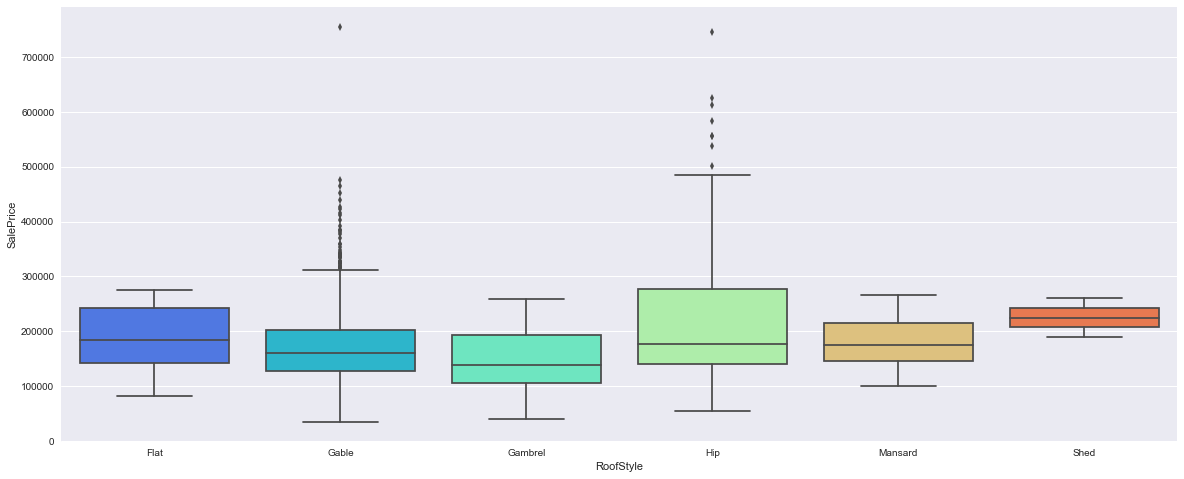

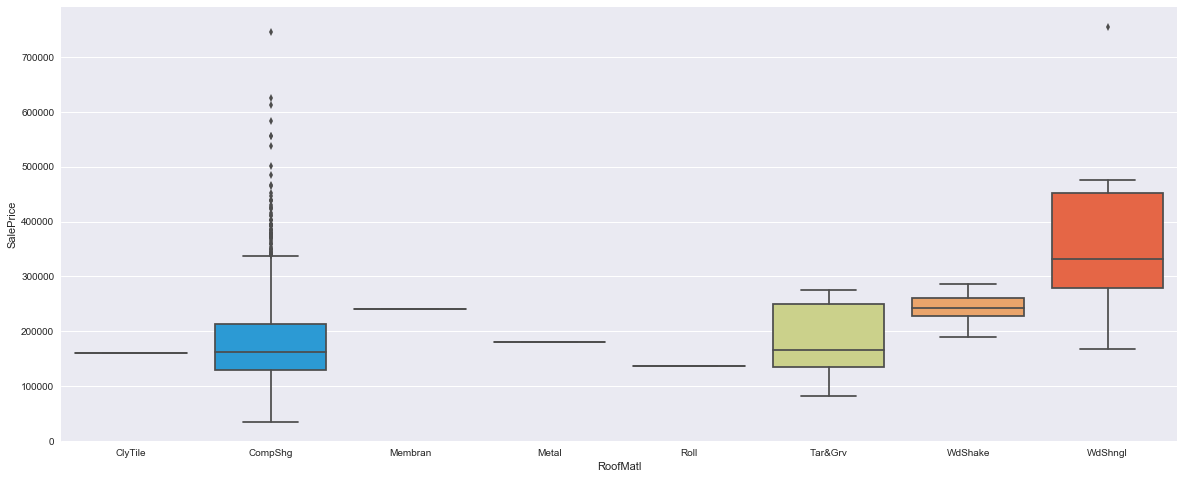

In [71]:
columns =['RoofStyle','RoofMatl']
boxplot(data,columns,data['SalePrice'])

Based on boxplot both RoofStyle and RoofMatl do not show evidence of ordinal category. Hence we will convert these columns to dummy variables

In [72]:
dummy_variables.extend(['RoofStyle','RoofMatl'])

#### Exterior1st and Exterior2nd

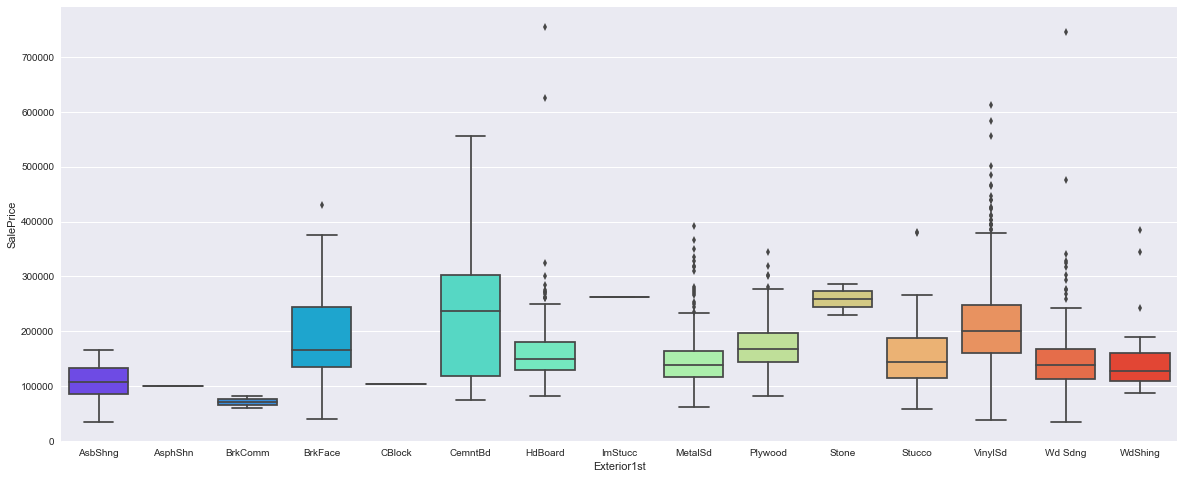

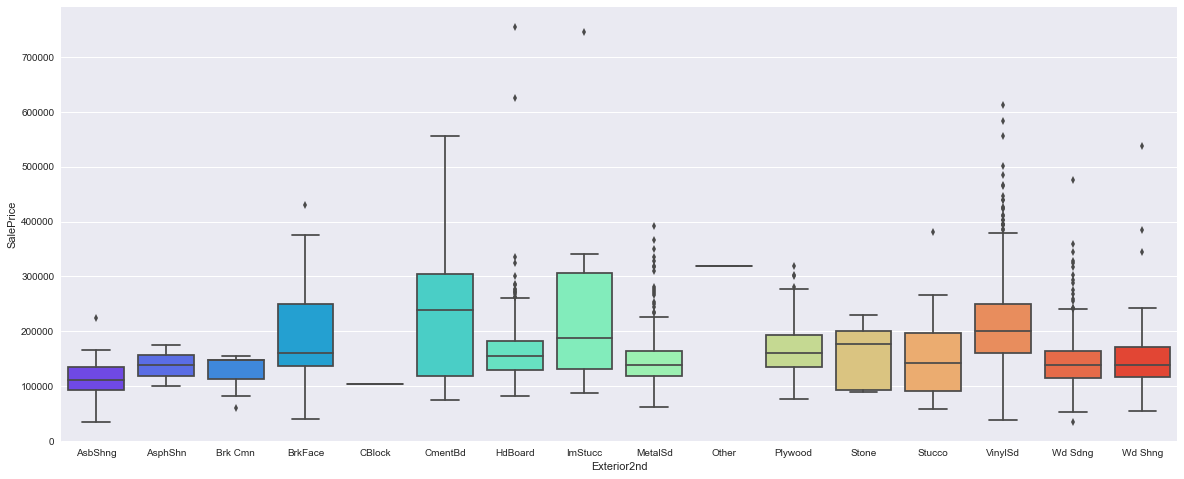

In [73]:
columns=['Exterior1st','Exterior2nd']
boxplot(data,columns,data['SalePrice'])

In Exterior1st and Exterior2nd, many categories have similar box plot, suggesting that they might not be ordinal features. Hence we will convert these columns to dummy variables

In [74]:
dummy_variables.extend(['Exterior1st','Exterior2nd'])

#### MasVnrType

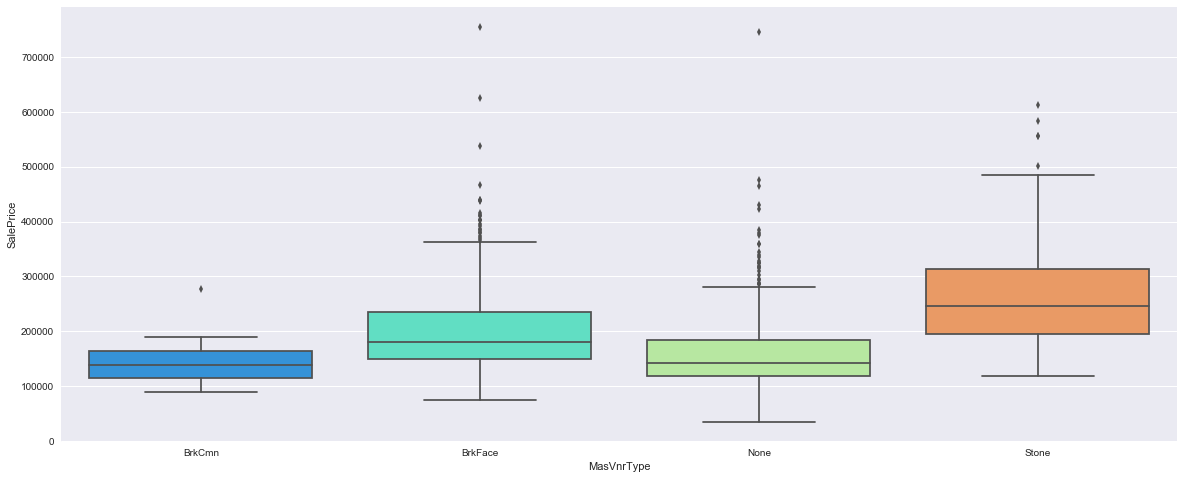

In [75]:
columns=['MasVnrType']
boxplot(data,columns,data['SalePrice'])

Boxplots are similar for few categories, hence we will convert these to dummy variables

In [76]:
dummy_variables.extend(['MasVnrType'])

#### ExterQual and ExterCond

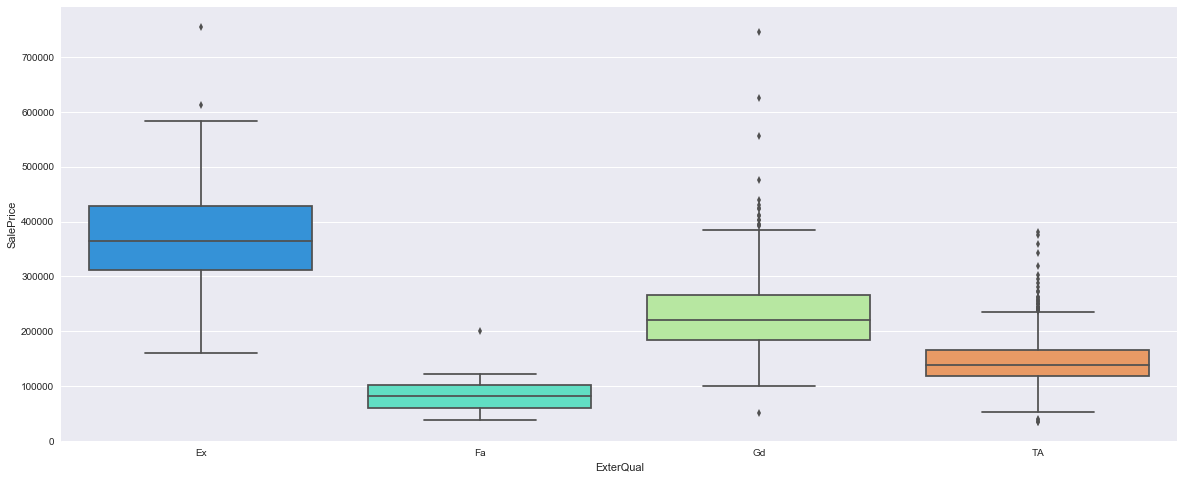

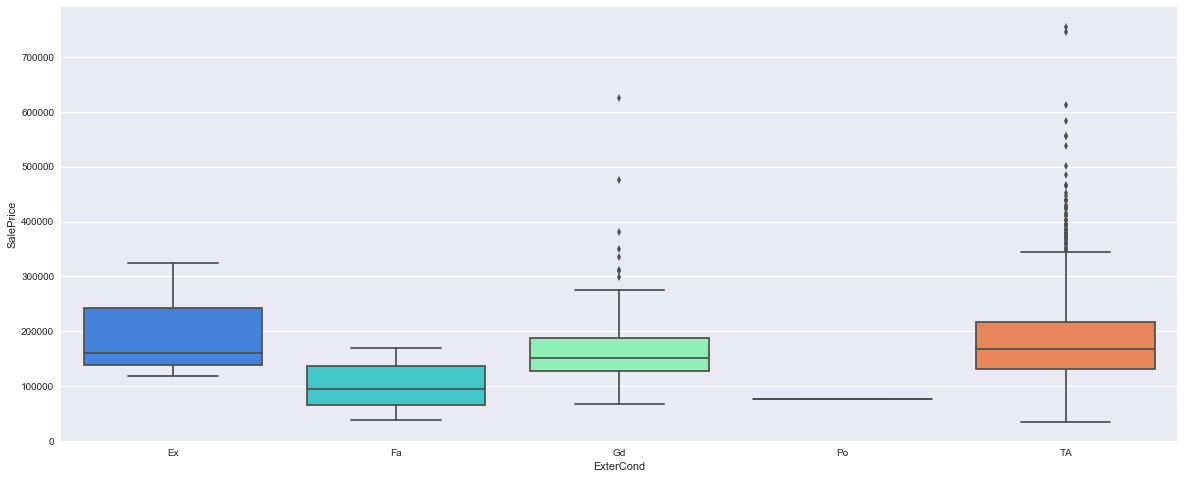

In [77]:
columns=['ExterQual','ExterCond']
boxplot(data,columns,data['SalePrice'])

In ExterQual, there is some sort of ordering. Hence we will perform label encoding.
In ExterCond there isnt any conclusive evidence to suggest ordering, hence we will convert this column to dummy variables

In [78]:
label_encoding.extend(['ExterQual'])
dummy_variables.extend(['ExterCond'])

#### 'Foundation' 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'

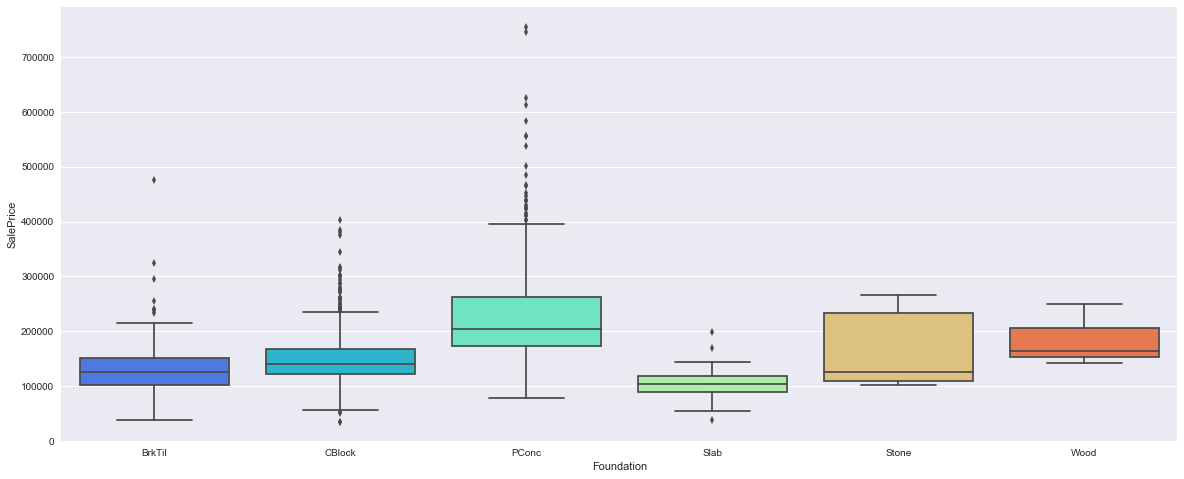

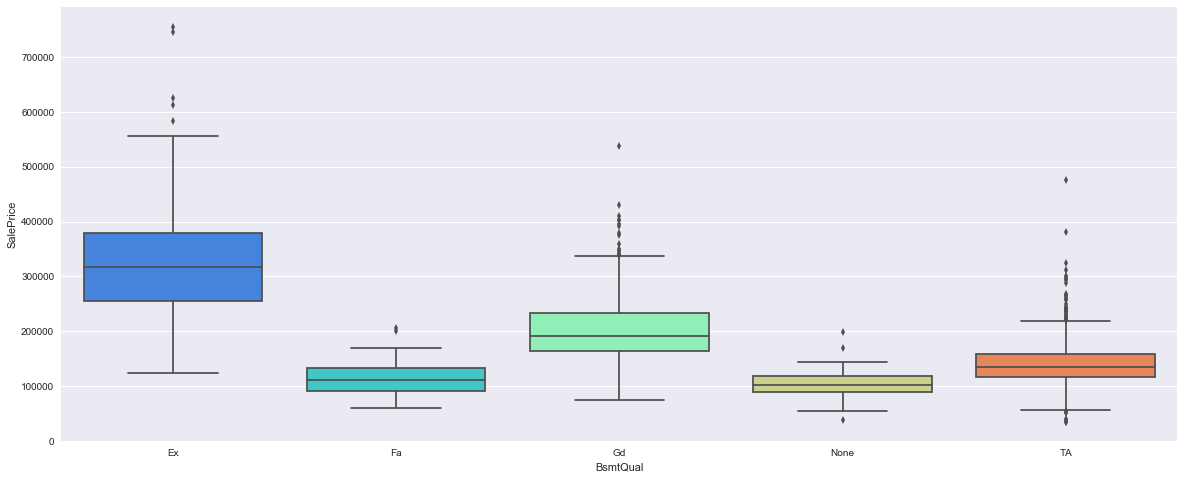

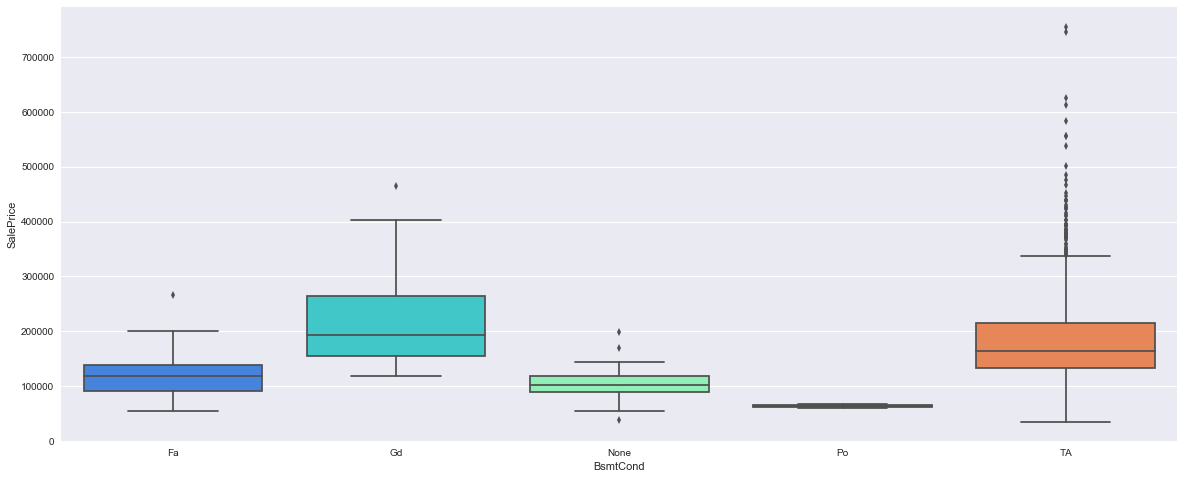

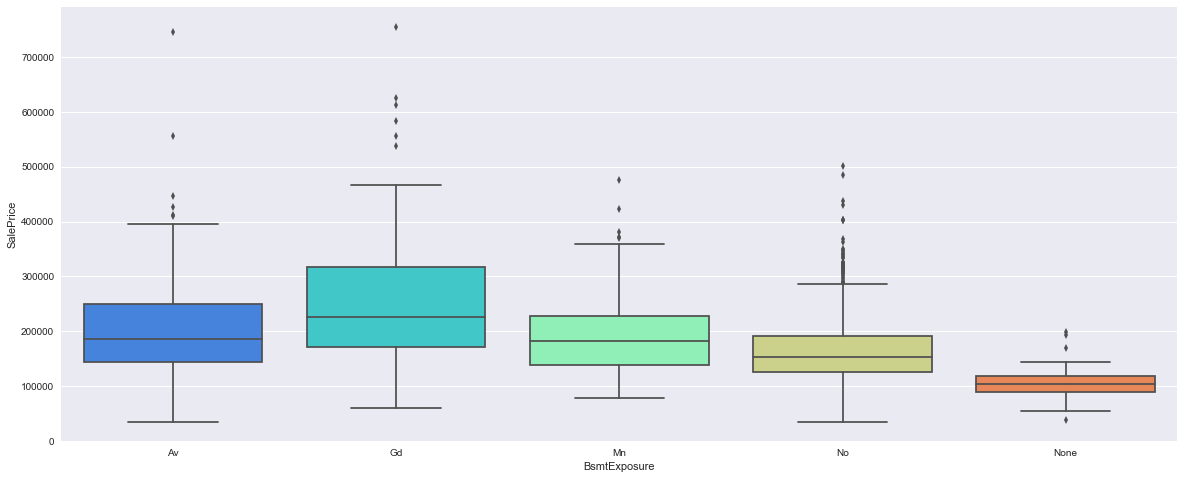

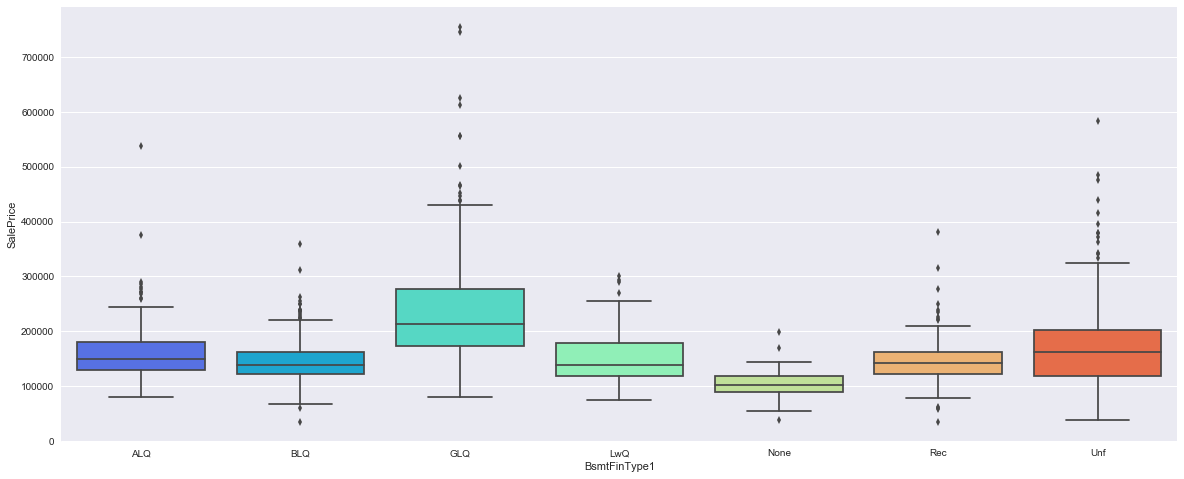

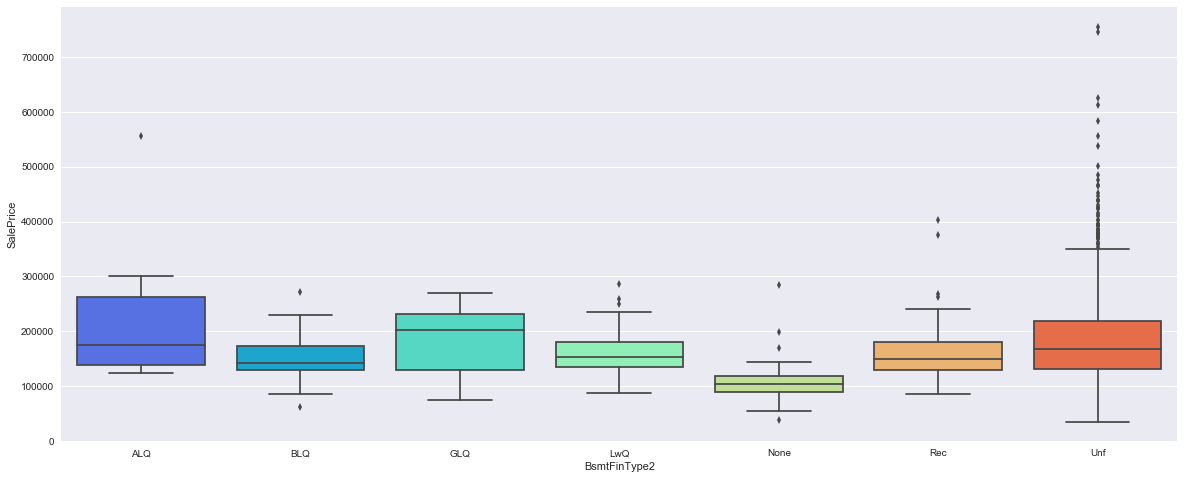

In [79]:
columns=['Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
boxplot(data,columns,data['SalePrice'])

In all Bsmt fetaures and foundation ordering cannot be clearly seen/
Hence we will perform label encoding on these features 

In [80]:

dummy_variables.extend(['Foundation','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2'])

#### HeatingQC,CentralAir,Electrical

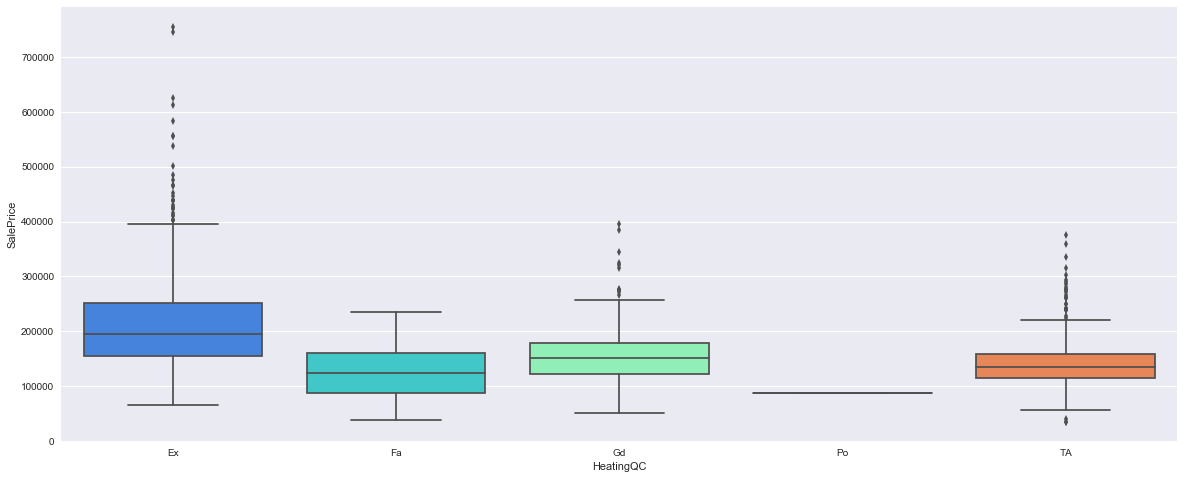

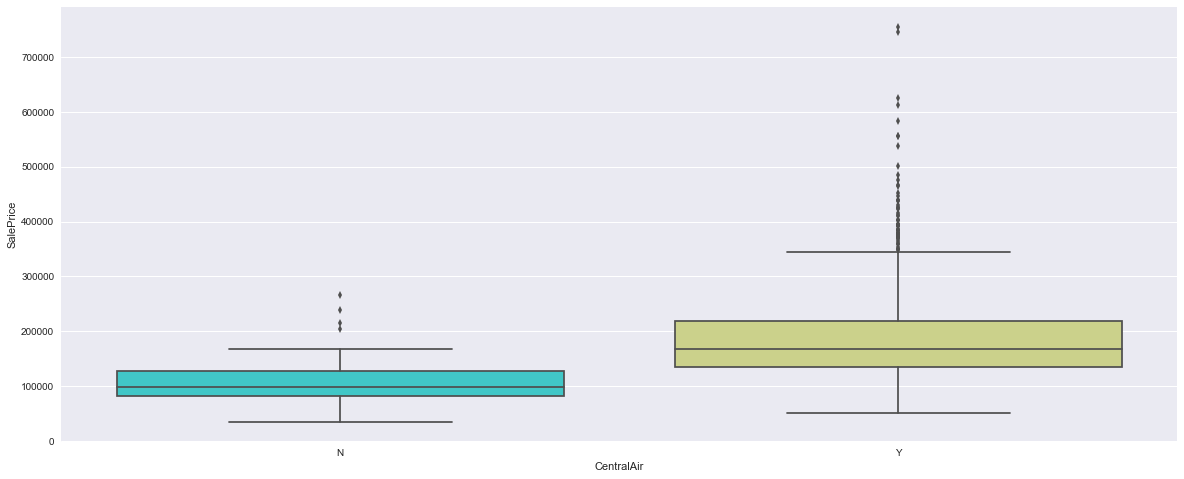

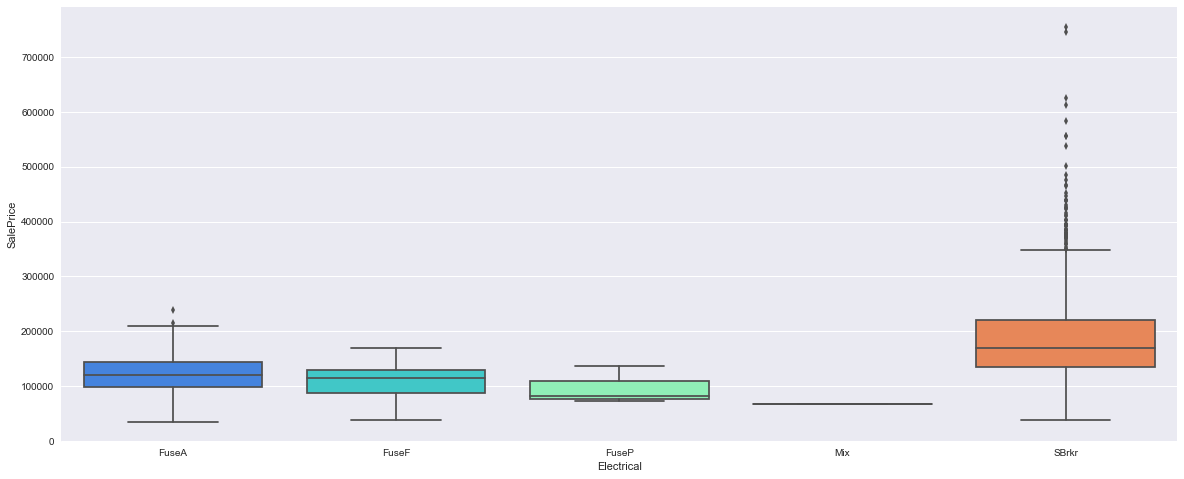

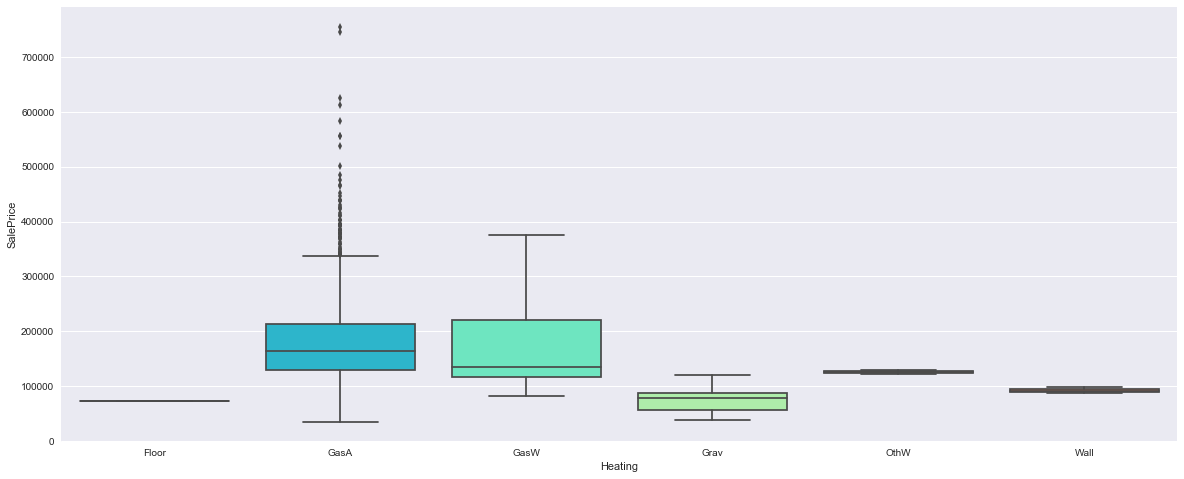

In [81]:
columns=['HeatingQC','CentralAir','Electrical','Heating']
boxplot(data,columns,data['SalePrice'])

Only Central Air shows some ordering , we will perform label encoding  
For Electrical, HeatingQC and Heating we will convert to dummy variables

In [82]:
label_encoding.extend(['CentralAir'])
dummy_variables.extend(['Electrical','HeatingQC','Heating'])

#### KitchenQual,Functional	and FireplaceQu

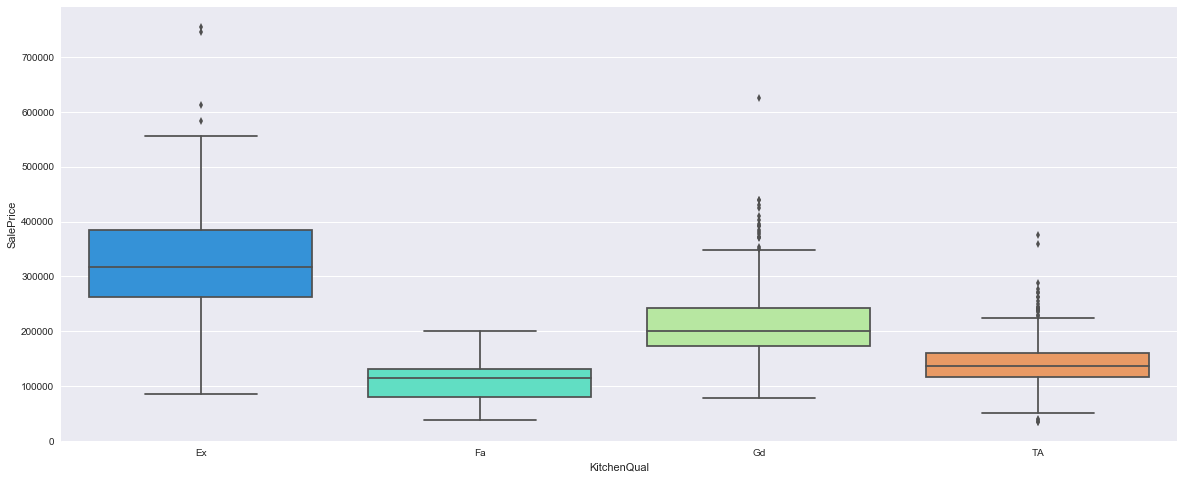

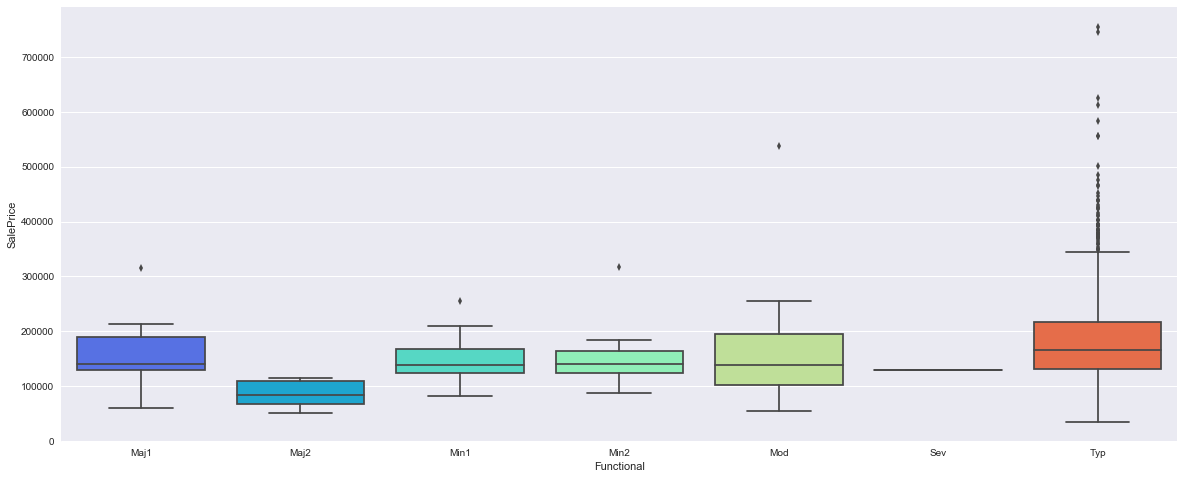

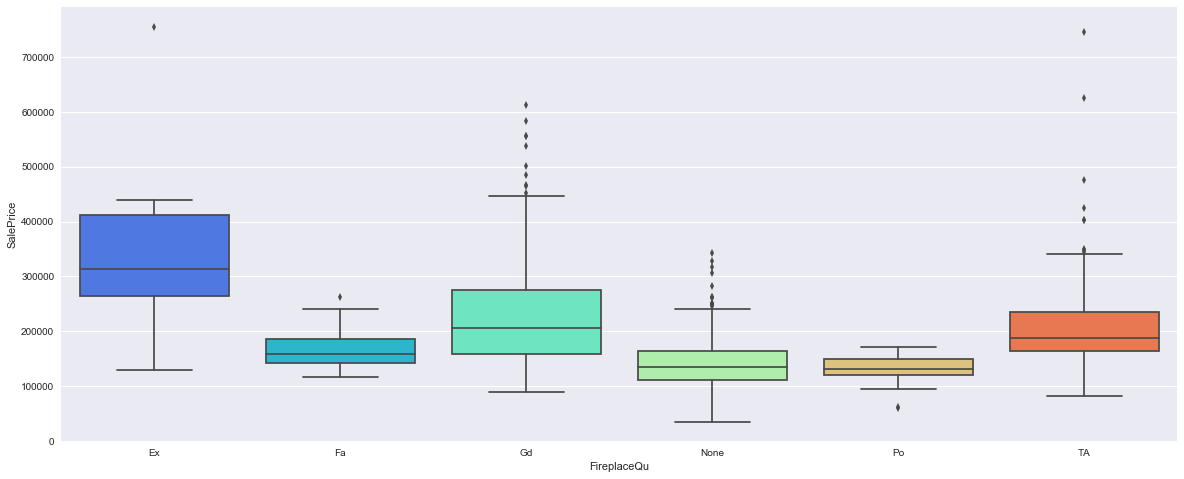

In [83]:
columns=['KitchenQual','Functional','FireplaceQu']
boxplot(data,columns,data['SalePrice'])

In KitchenQual there is distinct ordering and hence we will perform label encoding.  
FireplaceQu SalePrice is high for 'Ex' label, remaining labels are comparable. We will convert FireplaceQu to dummy variables.   
functional has no distinct ordering evident. functional feature will be converted to dummy variables.


In [84]:
label_encoding.extend(['KitchenQual'])
dummy_variables.extend(['FireplaceQu','Functional'])

#### GarageType	GarageFinish GarageQual	GarageCond

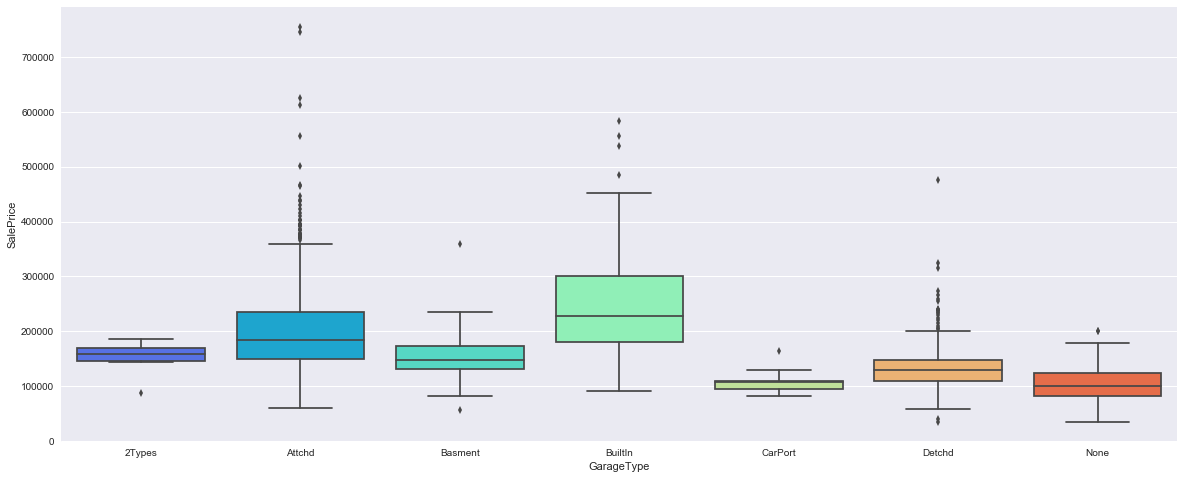

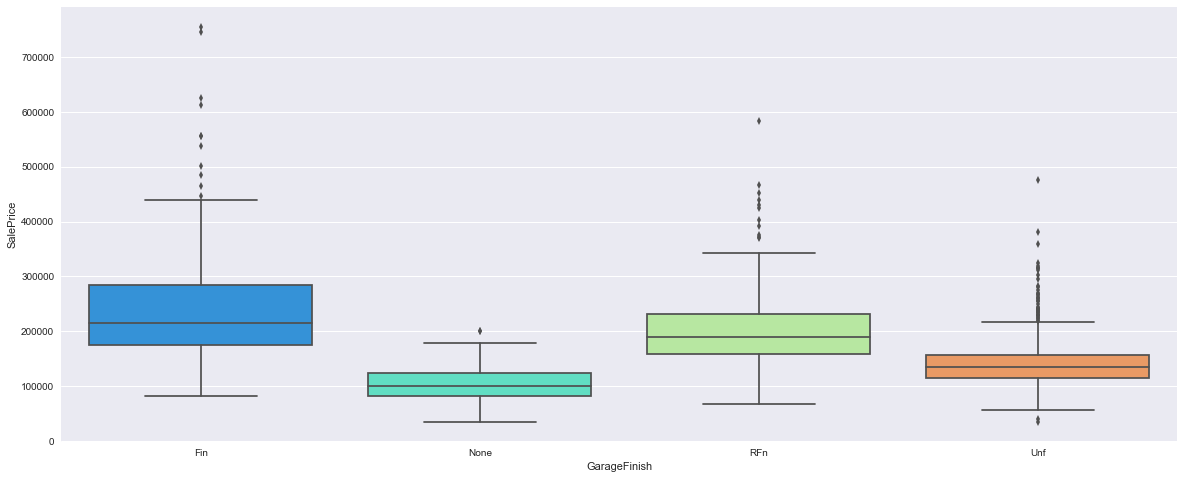

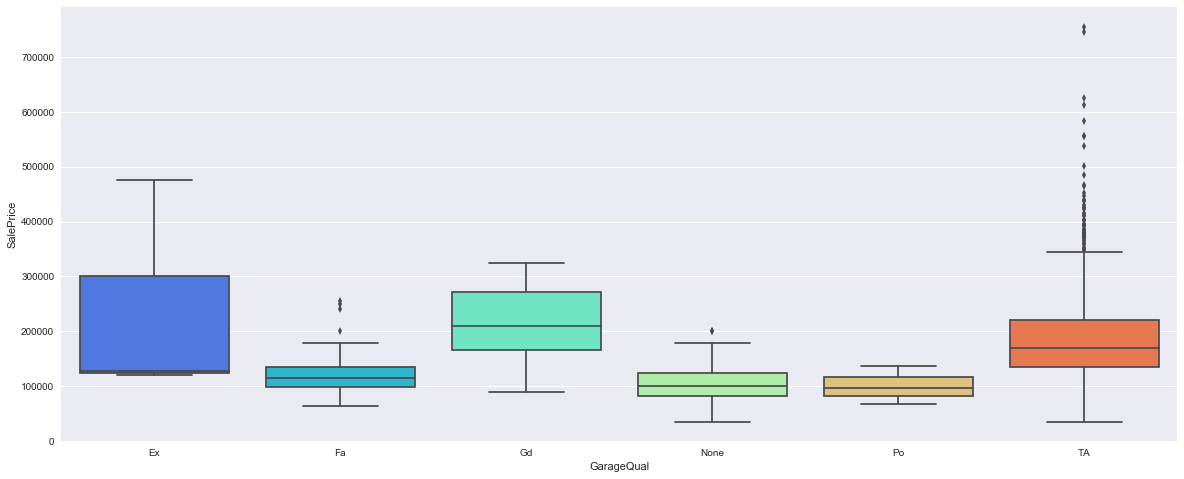

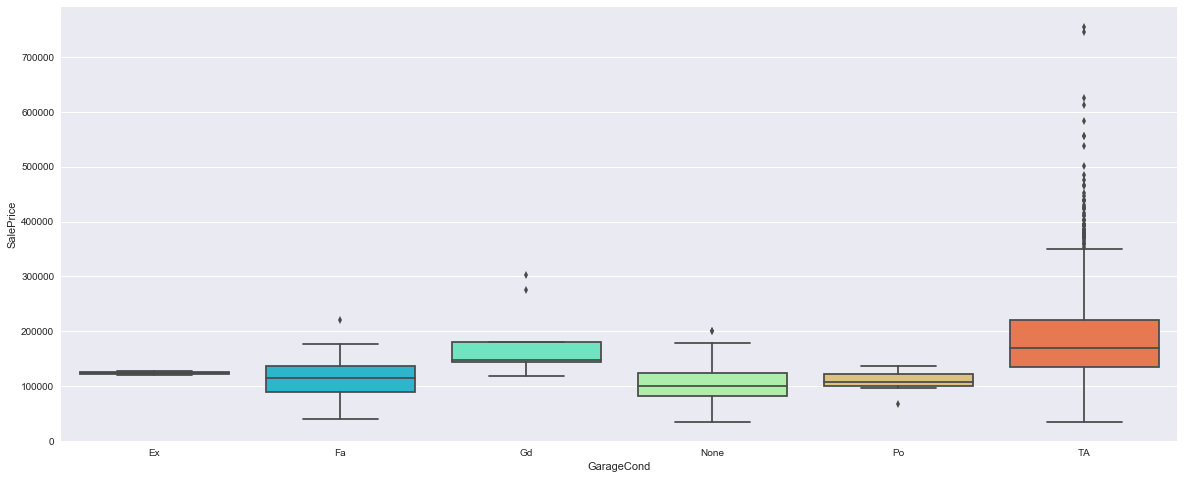

In [85]:
columns=['GarageType','GarageFinish','GarageQual','GarageCond']
boxplot(data,columns,data['SalePrice'])

GargeFinish shows some ordering, hence we will perform label encoding.  
GarageType, GarageQual,GarageCond do not show major ordering, hence we will convert to dummy variables

In [86]:
dummy_variables.extend(['GarageType','GarageQual','GarageCond'])
label_encoding.extend(['GarageFinish'])

#### PavedDrive PoolQC Fence MiscFeature 

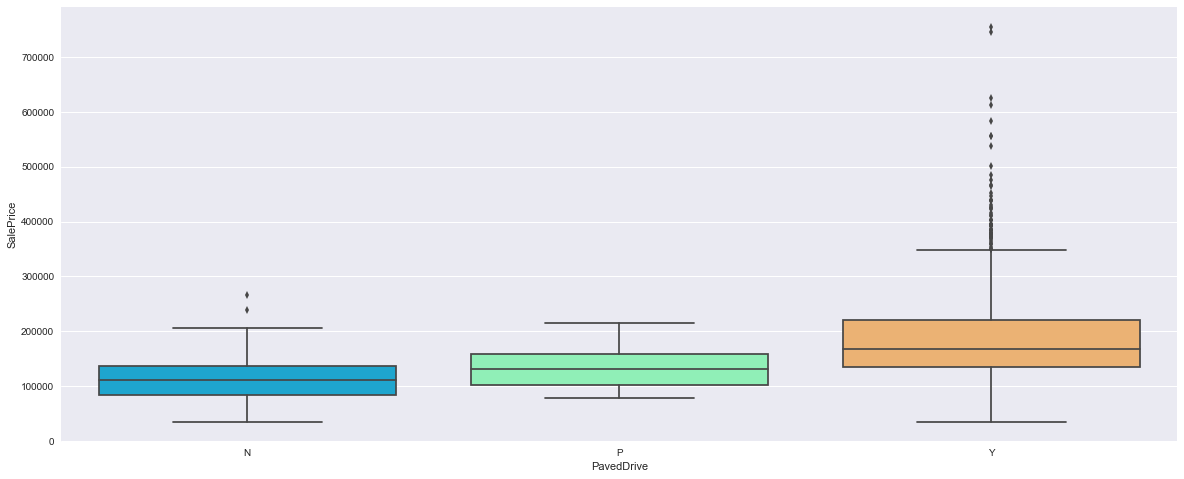

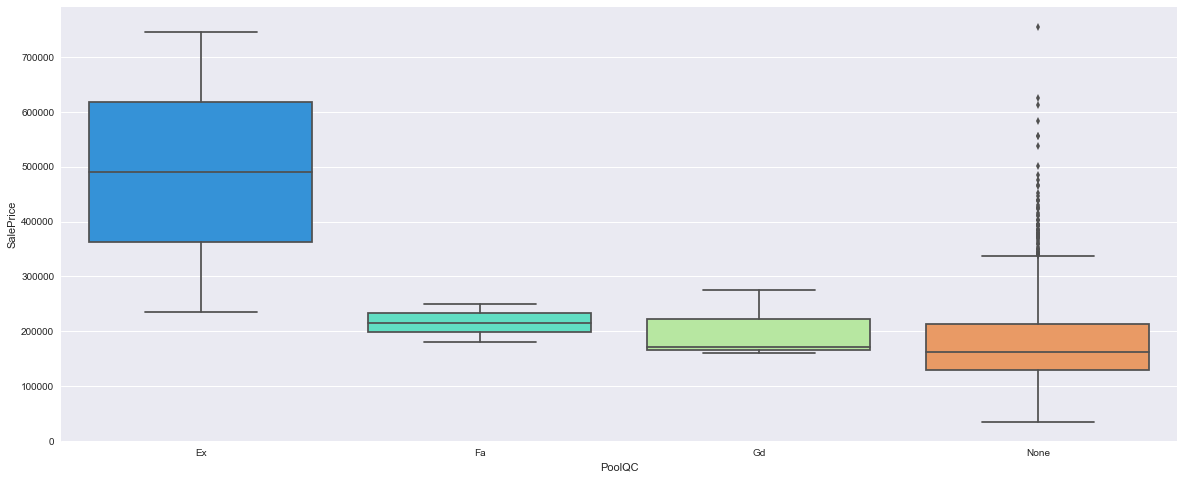

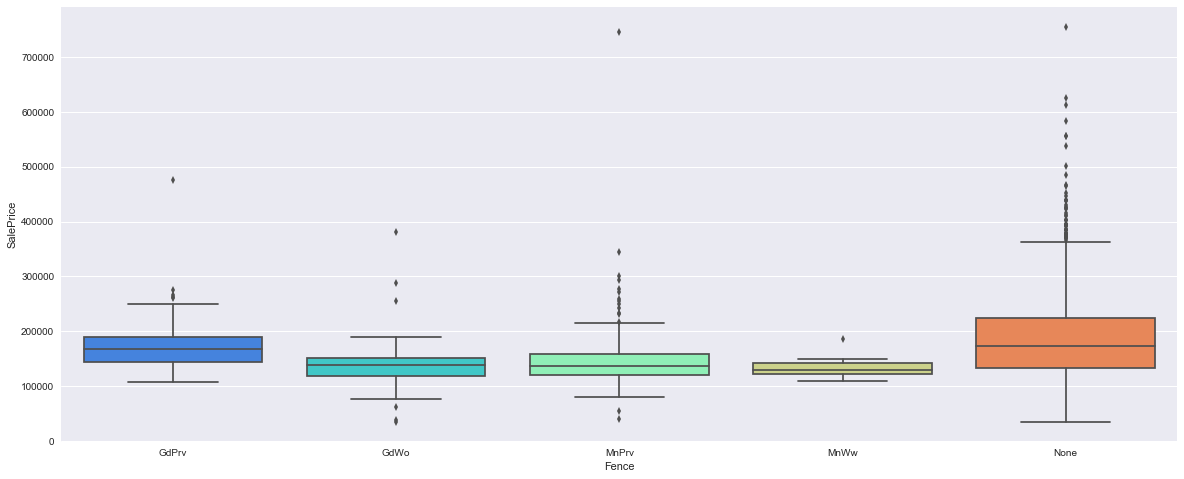

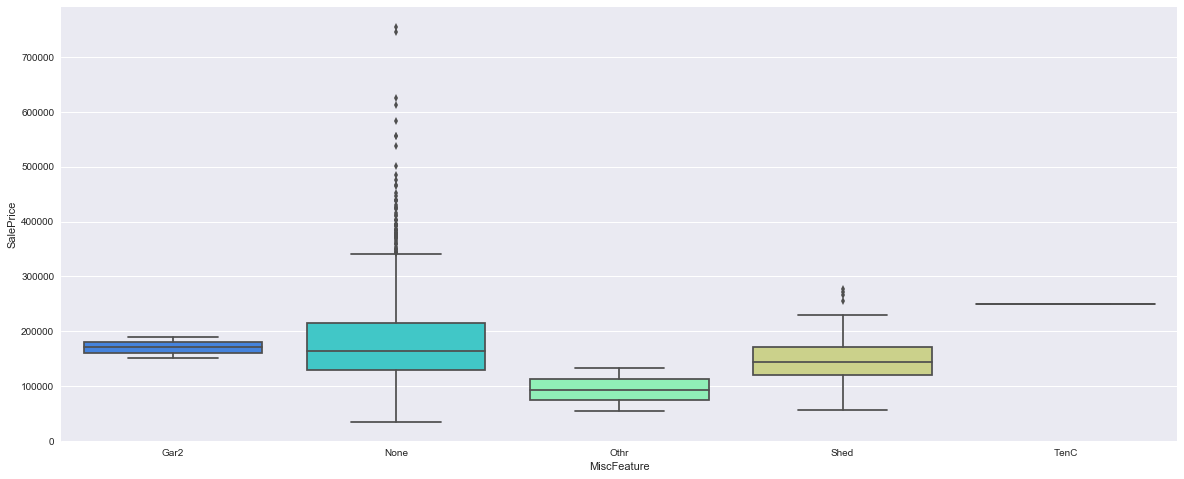

In [87]:
columns=['PavedDrive', 'PoolQC', 'Fence','MiscFeature']
boxplot(data,columns,data['SalePrice'])

PavedDrive and PoolQC has ordering so we will perform label encoding.  
MiscFeature few labels have similar boxplots, hence we convert to dummy variables.  
Fence doesnt show evident ordering, hence we convert to dummy variables

In [88]:
label_encoding.extend(['PavedDrive', 'PoolQC'])
dummy_variables.extend(['MiscFeature','Fence'])

##### SaleType and SaleCond

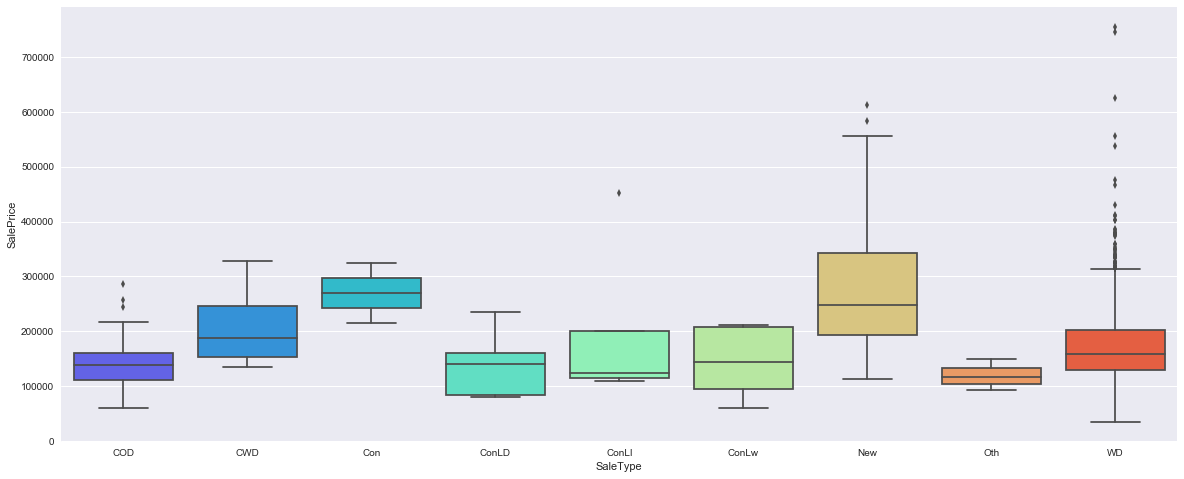

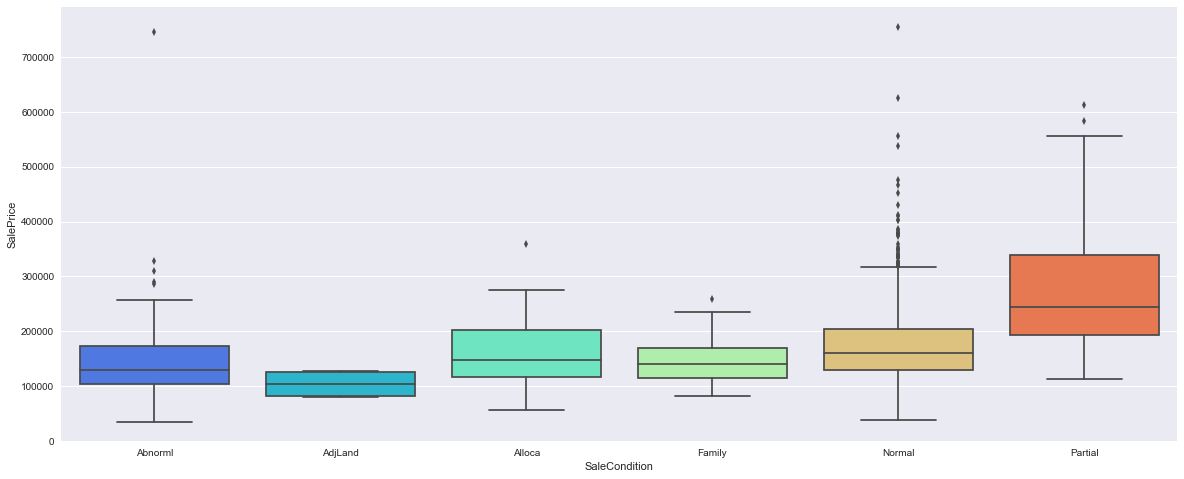

In [89]:
columns=['SaleType','SaleCondition']
boxplot(data,columns,data['SalePrice'])

Seems like they are not  ordinal features, hence we will convert these features to dummy variables

#### OverallQual and OverallCond

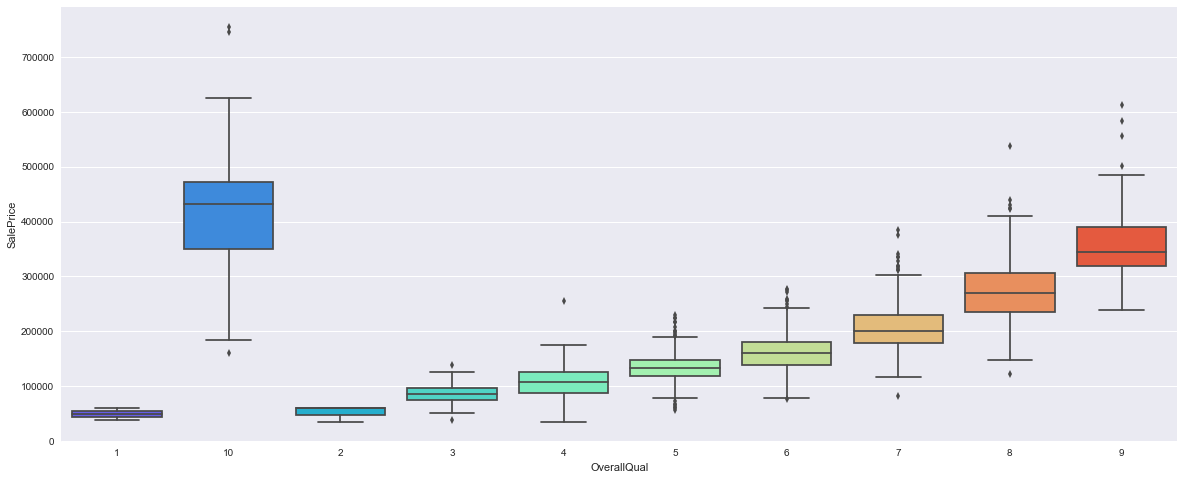

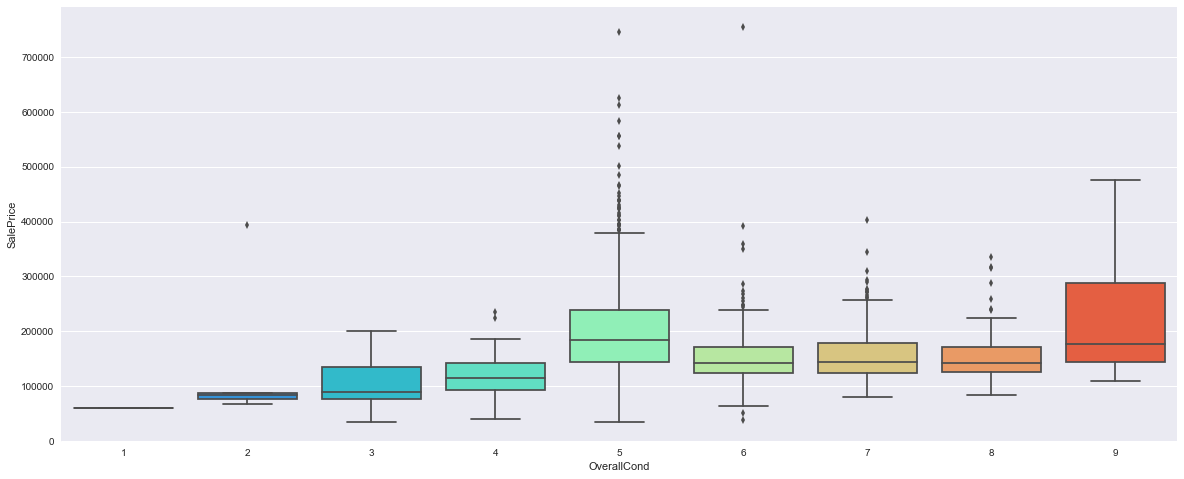

In [90]:
columns=['OverallQual','OverallCond']
boxplot(data,columns,data['SalePrice'])

There is clearly an ordering For OverallQual and OverallCond. We will perform label Encoding

#### YrSold and MoSold

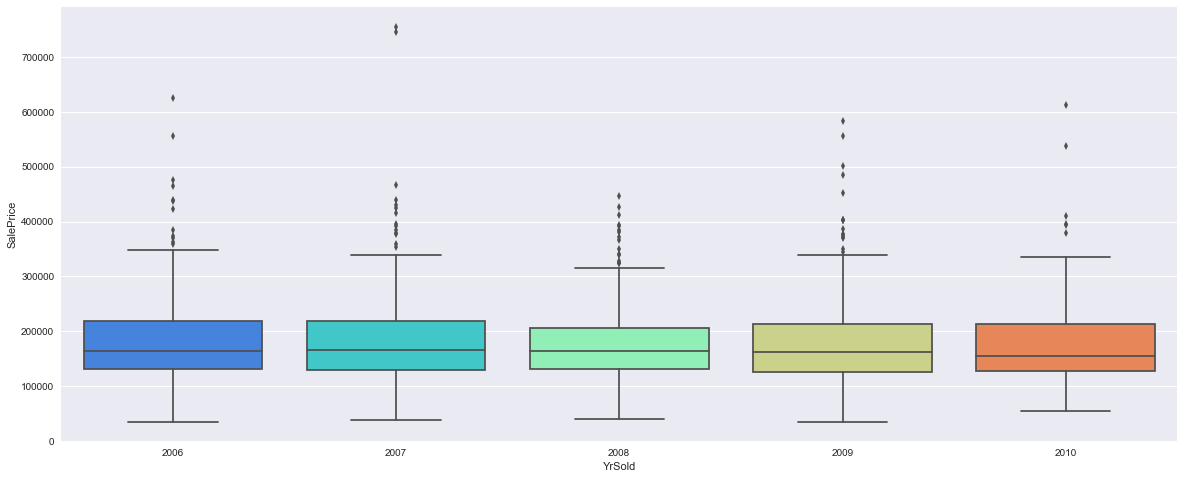

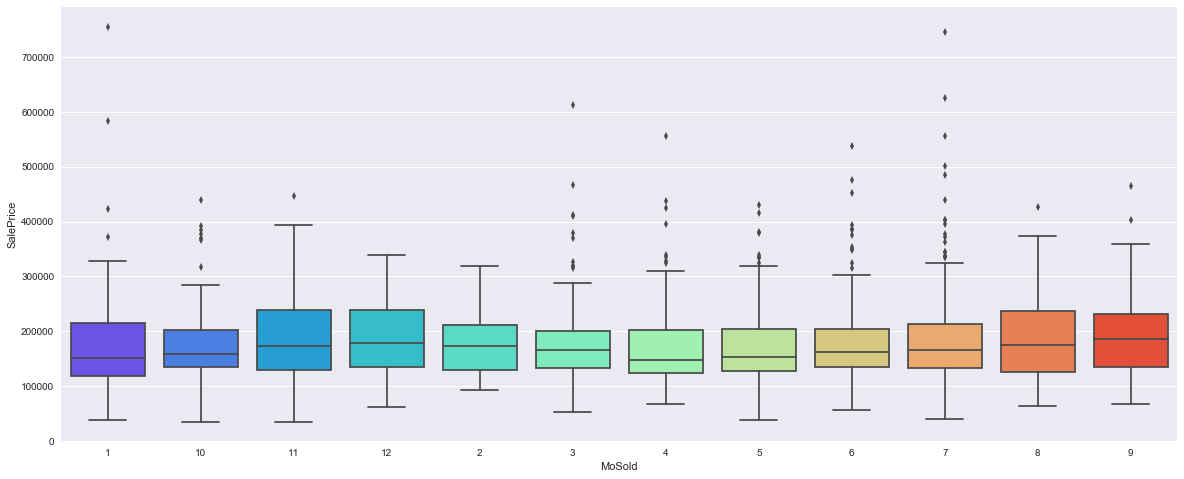

In [91]:
columns=['YrSold','MoSold']
boxplot(data,columns,data['SalePrice'])

MoSold,YrSold have no ordering as seen from box plot. Hence we will convert these to dummy variables

In [92]:
dummy_variables.extend(['SaleType','SaleCondition','MoSold','YrSold'])
label_encoding.extend(['OverallQual','OverallCond'])

In [93]:
len(label_encoding)+len(dummy_variables)

48

In [94]:
data[label_encoding].head()

,Street,Alley,ExterQual,CentralAir,KitchenQual,GarageFinish,PavedDrive,PoolQC,OverallQual,OverallCond
0,Pave,None,Gd,Y,Gd,RFn,Y,None,7,5
1,Pave,None,TA,Y,TA,RFn,Y,None,6,8
2,Pave,None,Gd,Y,Gd,RFn,Y,None,7,5
3,Pave,None,TA,Y,Gd,Unf,Y,None,7,5
4,Pave,None,Gd,Y,Gd,RFn,Y,None,8,5


## LabelEncoding

In [95]:
from sklearn.preprocessing import LabelEncoder


In [96]:
def label_encod(data_file,columns):
    """
    Performs label encoding on specified list of columns
    
    Returns - label encoded Dataframe 
    """
    for column in columns:
        label = LabelEncoder() 
        label.fit(list(data_file[column].values)) 
        data_file[column] = label.transform(list(data_file[column].values))
    return data_file

In [97]:
data=label_encod(data,label_encoding)
test_data=label_encod(test_data,label_encoding)

In [98]:
print(data.shape, test_data.shape)

(1460, 80) (1459, 79)


In [99]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,1,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,2,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,None,Attchd,2003.0,2,2,548,TA,TA,2,0,61,0,0,0,0,3,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,1,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,TA,Attchd,1976.0,2,2,460,TA,TA,2,298,0,0,0,0,0,3,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,1,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,2,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,TA,Attchd,2001.0,2,2,608,TA,TA,2,0,42,0,0,0,0,3,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,1,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,Gd,Detchd,1998.0,3,3,642,TA,TA,2,0,35,272,0,0,0,3,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,1,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,2,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,TA,Attchd,2000.0,2,3,836,TA,TA,2,192,84,0,0,0,0,3,None,None,0,12,2008,WD,Normal,250000


In [100]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,65.0,11622,1,1,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3,5,Typ,0,None,Attchd,1961.0,3,1.0,730.0,TA,TA,2,140,0,0,0,120,0,2,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,80.0,14267,1,1,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.0,3,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,Typ,0,None,Attchd,1958.0,3,1.0,312.0,TA,TA,2,393,36,0,0,0,0,2,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,68.0,13830,1,1,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,4,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,Typ,1,TA,Attchd,1997.0,0,2.0,482.0,TA,TA,2,212,34,0,0,0,0,2,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,60.0,9978,1,1,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,3,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,1,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,Typ,1,Gd,Attchd,1998.0,0,2.0,470.0,TA,TA,2,360,36,0,0,0,0,2,None,None,0,6,2010,WD,Normal
4,120,RL,84.0,5005,1,1,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,4,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,Typ,0,None,Attchd,1992.0,2,2.0,506.0,TA,TA,2,0,82,0,0,144,0,2,None,None,0,1,2010,WD,Normal


## Convert to Dummy Variables

In [101]:
def convert_dummies(data_file,columns):
    data_file = pd.get_dummies(data_file, columns =columns , drop_first =True)
    return data_file

In [102]:
data=convert_dummies(data,dummy_variables)

In [103]:
print(data.shape)

(1460, 277)


In [104]:
data.head()

,LotFrontage,LotArea,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandSlope_Mod,LandSlope_Sev,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleConditi

In [105]:
test_data = convert_dummies(test_data,dummy_variables)

In [106]:
print(test_data.shape)

(1459, 276)


In [107]:
test_data.head()

,LotFrontage,LotArea,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandSlope_Mod,LandSlope_Sev,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand

## Checking for Outliers

#### SalePrice vs GrLivArea

Text(0,0.5,'SalePrice')

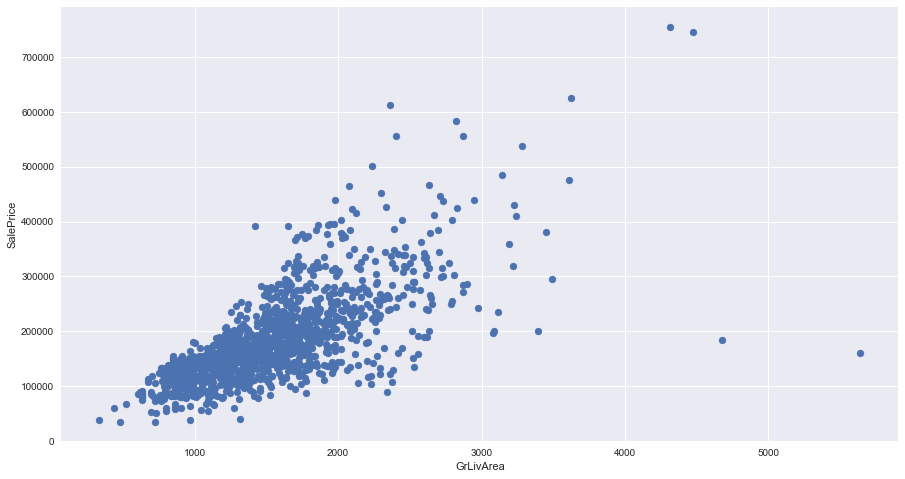

In [108]:
plt.figure(figsize=(15,8))
plt.scatter(x='GrLivArea',y='SalePrice',data=data)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

The two values to the extreme of GrLivArea is not along the trend, suggesting that the data is outlier. We can remove corresponding rows

In [109]:
data.drop(list(data[np.logical_and(data['GrLivArea']>4000,data['SalePrice']<200000)].index.values),inplace=True)

#### SalePrice vs TotalBsmtSF

Text(0,0.5,'SalePrice')

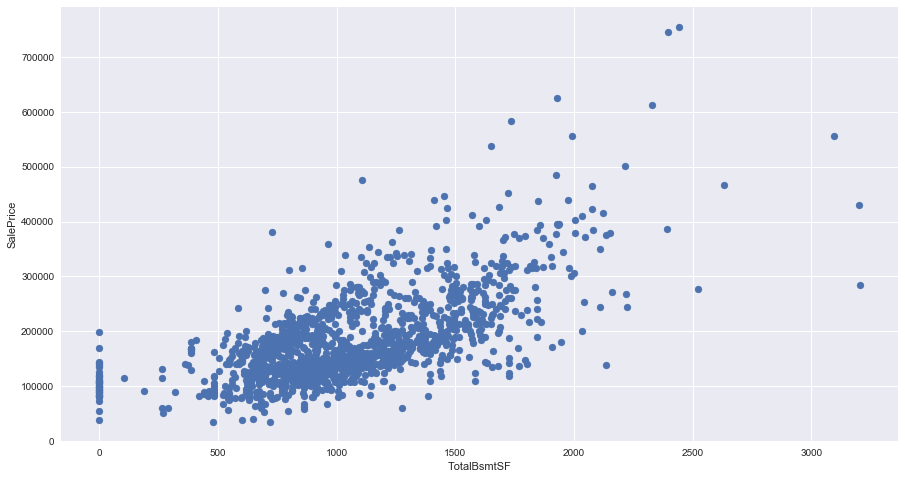

In [110]:
plt.figure(figsize=(15,8))
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=data)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

Not convincing enough to say there are any outiers

#### SalePrice vs GarageArea

Text(0,0.5,'SalePrice')

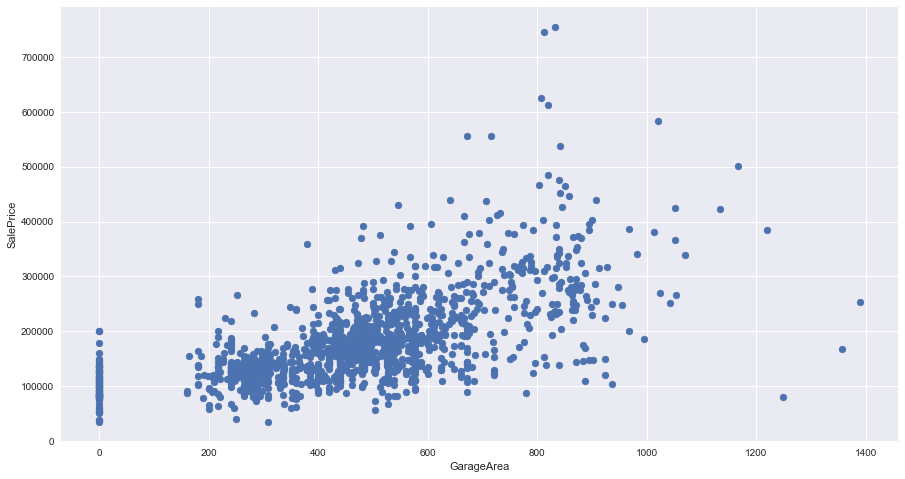

In [111]:
plt.figure(figsize=(15,8))
plt.scatter(x='GarageArea',y='SalePrice',data=data)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

The bottom 3 points seems to be outliers.Hence we can remove them 

In [112]:
data.drop(list(data[np.logical_and(data['GarageArea']>1200,data['SalePrice']<300000)].index.values),inplace=True)

## Train Test Split

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['SalePrice'], axis = 1),
                                                    data['SalePrice'], 
                                                    test_size = 0.3, random_state = 0)

## Feature Selection

#### Removing Constant Features

In [114]:
#### Constant Features
def constant_features(data_file):
    features=[col for col in data_file.columns if len(data_file[col].unique())==1]
    return features

In [115]:
const_features = constant_features(X_train)
print(const_features)

['MasVnrArea', 'MSSubClass_150', 'Condition2_PosA', 'Condition2_PosN', 'RoofMatl_Membran', 'RoofMatl_Roll', 'MiscFeature_Othr', 'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con']


In [116]:
X_train.drop(labels = const_features, axis = 1, inplace=True)
X_test.drop(labels = const_features, axis = 1, inplace=True)
test_data.drop(labels = const_features, axis = 1, inplace=True)

In [117]:
print(X_train.shape,X_test.shape,test_data.shape)

(1018, 266) (437, 266) (1459, 266)


#### Removing Quasi Constant Features

In [118]:
#### Quasi Consatnt 
def quasi_const(data_file):
    quasi_constant_feat = []
    for feature in data_file.columns:
        predominant = (X_train[feature].value_counts() / np.float(len(X_train))).sort_values(ascending=False).values[0]
        if predominant > 0.998:
            quasi_constant_feat.append(feature)
    return quasi_constant_feat


In [119]:
quasi_constant_features=quasi_const(X_train)
print(quasi_constant_features)

['Street', 'MSSubClass_40', 'LotConfig_FR3', 'Utilities_NoSeWa', 'Neighborhood_Blueste', 'Condition1_RRNe', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_Po', 'Foundation_Wood', 'BsmtCond_Po', 'Electrical_FuseP', 'Electrical_Mix', 'HeatingQC_Po', 'Heating_OthW', 'Functional_Maj2', 'Functional_Sev', 'SaleType_Oth']


In [120]:
X_train.drop(labels = quasi_constant_features, axis = 1, inplace=True)
X_test.drop(labels = quasi_constant_features, axis = 1, inplace=True)
test_data.drop(labels = quasi_constant_features, axis = 1, inplace=True)

In [121]:
print(X_train.shape,X_test.shape,test_data.shape)

(1018, 237) (437, 237) (1459, 237)


#### Removing Duplicated Features 

In [122]:
def dup_features(data_file):
    dat_file_t=data_file.T
    feature=list(dat_file_t[dat_file_t.duplicated()].index.values)
    return feature

In [123]:
duplicated_feature=dup_features(X_train)
print(duplicated_feature)

['BldgType_Duplex', 'BsmtQual_None', 'BsmtFinType1_None', 'GarageQual_None', 'GarageCond_None']


In [124]:
X_train.drop(labels = duplicated_feature, axis = 1, inplace=True)
X_test.drop(labels = duplicated_feature, axis = 1, inplace=True)
test_data.drop(labels = duplicated_feature, axis = 1, inplace=True)

In [125]:
print(X_train.shape,X_test.shape,test_data.shape)

(1018, 232) (437, 232) (1459, 232)


#### Removing highly correlated Features ( If Correlation among Independent Variables is greater than 0.8)

In [126]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [127]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

25

In [128]:
corr_features

{'BldgType_2fmCon',
 'BsmtCond_None',
 'BsmtExposure_None',
 'BsmtFinType2_None',
 'ExterCond_TA',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_None',
 'GarageArea',
 'GarageType_None',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SLvl',
 'MSZoning_RM',
 'MiscFeature_Shed',
 'Neighborhood_Somerst',
 'PoolQC',
 'RoofStyle_Hip',
 'SaleCondition_Partial',
 'SaleType_WD',
 'TotRmsAbvGrd'}

In [129]:
X_train.drop(labels = corr_features, axis = 1, inplace=True)
X_test.drop(labels = corr_features, axis = 1, inplace=True)
test_data.drop(labels = corr_features, axis = 1, inplace=True)

In [130]:
print(X_train.shape, X_test.shape,test_data.shape)

(1018, 207) (437, 207) (1459, 207)


## For Linear Models

As seen before SalePrice is skewed , hence for linear model we will take log of SalePrice

In [131]:
y_train_linear = np.log(y_train)
y_test_linear = np.log(y_test)

In [132]:
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()
test_data_linear=test_data.copy()

In [133]:
data_linear=pd.concat([X_train_linear,pd.DataFrame(y_train_linear)],axis=1)

## Correlation

In [134]:
#Getting all attributes whose correlation with Target(SalePriec) is greater than 0.5
correaltion_with_target=data_linear.corr()['SalePrice'][data_linear.corr()['SalePrice']>=0.5]

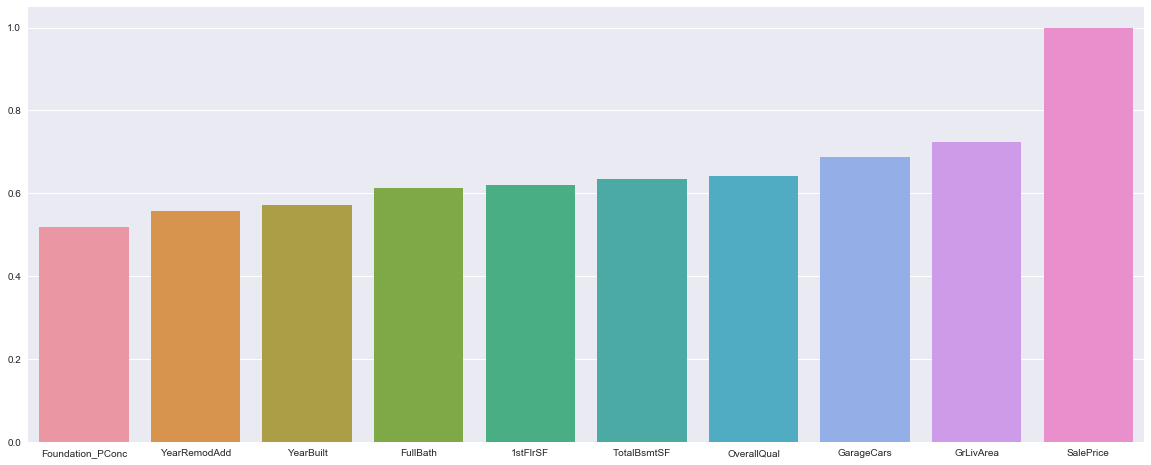

In [135]:
plt.figure(figsize=(20,8))
sns.barplot(x=correaltion_with_target.sort_values().index,y=correaltion_with_target.sort_values().values)

#### Selecting features obtained from correaltion

In [136]:
linear_variables_selected = list(correaltion_with_target.index[0:-1])
X_train_linear=X_train_linear[linear_variables_selected]
X_test_linear=X_test_linear[linear_variables_selected]
test_data_linear =test_data_linear[linear_variables_selected]

#### Data Normalization for linear models

In [137]:
def standardization(X_train_data,X_test_data,test_data_normal,columns):
    """
    standardize the data and return the data with selected columns
    """
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_data = scaler.fit_transform(X_train_data)
    X_test_data = scaler.transform(X_test_data)
    test_data_normal = scaler.transform(test_data_normal)

    X_train_data = pd.DataFrame(X_train_data, columns=columns)
    X_test_data = pd.DataFrame(X_test_data, columns=columns)
    test_data_normal=pd.DataFrame(test_data_normal,columns=columns)
    return X_train_data,X_test_data,test_data_normal

In [138]:
X_train_linear,X_test_linear,test_data_linear=standardization(X_train_linear,X_test_linear,test_data_linear,linear_variables_selected)

## Multiple Linear Regression

In [139]:
r2_accuracy_model ={}
mse_accuracy_model={}

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
def linear_regression(train,train_target):
    """
    Fit Linear regression model on train, train_target and performs 10 fold cross validation
    
    Returns - Regression model, r2_mean,r2_standard_deviations,mse_mean,mse_standard_deviation
    """
    regressor_multiple=LinearRegression()
    regressor_multiple.fit(train,train_target)
    accuracies_r2 = cross_val_score(estimator = regressor_multiple, X = train, y = train_target, cv = 10,scoring='r2')
    accuracies_mse = cross_val_score(estimator = regressor_multiple, X = train, y = train_target, cv = 10,scoring='neg_mean_squared_error')
    print('Mean R2: ',accuracies_r2.mean())
    print('Standard Devaition of R2: ',accuracies_r2.std())
    print("-----------------------")
    print('Mean MSE: ',accuracies_mse.mean())
    print('Standard Devaition of MSE: ',accuracies_mse.std())
    return regressor_multiple,accuracies_r2.mean(),accuracies_r2.std(),accuracies_mse.mean(),accuracies_mse.std()
    

In [141]:
regressor_multiple,linear_r2_mean,linear_r2_std,linear_mse_mean,linear_mse_std=linear_regression(X_train_linear,y_train_linear)

Mean R2:  0.8301988312148255
Standard Devaition of R2:  0.022926736801932798
-----------------------
Mean MSE:  -0.026225787388149756
Standard Devaition of MSE:  0.007304985274591099


Note : Those scores are negative MSE scores, i.e. negate them and you get the MSE  
Reference: https://stackoverflow.com/questions/21050110/sklearn-gridsearchcv-with-pipeline

#### Saving Rsquared and mse obtained from cross validation

In [142]:
r2_accuracy_model['Linear Regression']=linear_r2_mean
mse_accuracy_model['Linear Regression']=linear_mse_mean

#### Defining function to find Rsquared and MSE on X_test(Obtained by train test split)

In [143]:
def R2_and_MSE(model,X_test_data,y_actual):
    """
    model - estimator(model built)
    X_test_data  - test data for which Rsquared and MSE has to be calculated
    y_actual - actual target variable values
    
    Returns - rsquared of log values, rsquared of actual values,mse of log value , mse of actual values, predicted values
    """
    y_pred=model.predict(X_test_data)
    r2_log = r2_score(y_actual,y_pred)
    r2_actual = r2_score(np.exp(y_actual),np.exp(y_pred))
    
    print("R_squared_log: ",r2_log)
    print("R_squared_actual: ",r2_actual)
    print('--------------------------------')
    
    mse_log=mean_squared_error(y_actual,y_pred)
    mse_actual=mean_squared_error(np.exp(y_actual),np.exp(y_pred))
    
    print("mse_log: ",mse_log )
    print("mse_actual: ",mse_actual)
    return r2_log,r2_actual,mse_log,mse_actual,y_pred


In [144]:
#Calculate R2 and MSE on X_test
R_squared_log_multiple,R_squared_actual_multiple,MSE_log_multiple,MSE_actual_multiple,y_predict_multiple=R2_and_MSE(regressor_multiple,X_test_linear,y_test_linear)

R_squared_log:  0.8389907334999734
R_squared_actual:  0.8288638554456521
--------------------------------
mse_log:  0.027325618195220926
mse_actual:  1141862704.2990906


#### Plot of Actual vs Predicted

Text(0.5,1,'Multiple Regression')

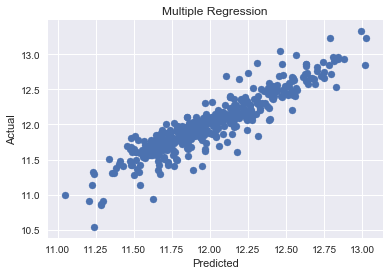

In [145]:
plt.scatter(x=y_predict_multiple,y=y_test_linear)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiple Regression')

## Multiple Linear Regression(Choosing Features Using Lasso)

#### Feature Selection using Lasso (for Linear Models)

In [146]:
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()
test_data_linear=test_data.copy()

#### Standardization

In [147]:
X_train_linear,X_test_linear,test_data_linear=standardization(X_train_linear,X_test_linear,test_data_linear,list(X_train_linear.columns))

#### Lasso Feature Selection

In [148]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


def Lasso_feature_selection(train,train_target,alphas):
    """
    Return alphas with corresponding Mean MSE and Standard deviation of MSE
    
    train - data on which Lasso Regression has to be applied
    train_target - response variable
    alphas - different values for regularization parameter for which Lasso Regression will be performed
    
    """
    linear_lasso_mean={}
    linear_lasso_std={}
    for alpha_value in alphas:
        r2_values = []
        sel_ = SelectFromModel(Lasso(alpha = alpha_value))
        sel_.fit(train, train_target)
        selected_features = train.columns[(sel_.get_support())]
        train_selected = train[selected_features]
        if(len(selected_features))>0:
            linear_model = LinearRegression()
            linear_model.fit(train_selected, train_target)
            r2_values = cross_val_score(X = train_selected, y = train_target, cv = 10, scoring = 'neg_mean_squared_error', estimator = linear_model)
            linear_lasso_mean[alpha_value]=r2_values.mean()
            linear_lasso_std[alpha_value]=r2_values.std()
    return linear_lasso_mean,linear_lasso_std
        


#### We will perfom Lasso Regression for different values of aplha


In [149]:
alphas=[0.5,0.3,0.2,0.1,0.09,0.08,0.07,0.05,0.04,0.03,0.02,0.01,0.001]
linear_mean,linear_std=Lasso_feature_selection(X_train_linear,y_train_linear,alphas)

In [150]:
linear_mean

{0.001: -0.014584861934221361,
 0.01: -0.01368114203637808,
 0.02: -0.015195963007402261,
 0.03: -0.01651528937256451,
 0.04: -0.017566004697226176,
 0.05: -0.02039750102712845,
 0.07: -0.02215316777442308,
 0.08: -0.02379003773078941,
 0.09: -0.02552820639348935,
 0.1: -0.02601544848317372,
 0.2: -0.032358111932897574}

In [151]:
linear_std

{0.001: 0.004095718288115025,
 0.01: 0.00461326776390531,
 0.02: 0.004181195109867643,
 0.03: 0.004608614787516591,
 0.04: 0.00511552094921619,
 0.05: 0.005786553080603571,
 0.07: 0.006599666574975503,
 0.08: 0.007351809388230835,
 0.09: 0.00692629854486789,
 0.1: 0.007272256039032997,
 0.2: 0.00871831959559453}

Based on the above results,for alpha = 0.01 we have the least MSE. Hence we will choose alpha =0.01 for feature selection using Lasso Regression

In [152]:
sel_ = SelectFromModel(Lasso(alpha = 0.01))
sel_.fit(X_train_linear, y_train_linear)

#Select features based on coefficients obtained from Lasso Regression
selected_features_lasso = X_train_linear.columns[(sel_.get_support())]

X_train_linear = X_train_linear[selected_features_lasso]
X_test_linear = X_test_linear[selected_features_lasso]
regressor_multiple_lasso,linear_r2_mean_lasso,linear_r2_std_lasso,linear_mse_mean_lasso,linear_mse_std_lasso=linear_regression(X_train_linear,y_train_linear)


Mean R2:  0.9122158386707463
Standard Devaition of R2:  0.013734428022964675
-----------------------
Mean MSE:  -0.01368114203637808
Standard Devaition of MSE:  0.00461326776390531


#### Saving Rsquared and mse obtained from cross validation

In [153]:
r2_accuracy_model['Linear Regression Lasso']=linear_r2_mean_lasso
mse_accuracy_model['Linear Regression Lasso']=linear_mse_mean_lasso

In [154]:
#Calculate R2 and MSE for X_test
R_squared_log_multiple_lasso,R_squared_actual_multiple_lasso,MSE_log_multiple_lasso,MSE_actual_multiple_lasso,y_predict_multiple_lasso=R2_and_MSE(regressor_multiple_lasso,X_test_linear,y_test_linear)


R_squared_log:  0.9127123726073539
R_squared_actual:  0.9177540054246982
--------------------------------
mse_log:  0.014813982021946295
mse_actual:  548765627.6707704


#### Plot of Actual vs Predicted Values

Text(0.5,1,'Multiple Regression Lasso')

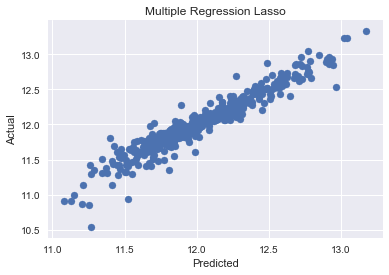

In [155]:
plt.scatter(x=y_predict_multiple_lasso,y=y_test_linear)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiple Regression Lasso')

## Ridge Regression

In [156]:
linear_model_ridge = Ridge()
linear_model_ridge.fit(X_train_linear, y_train_linear)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### Get R2 and MSE mean scores obtained by 10 fold cross validation

In [157]:
accuracy_r2=cross_val_score(linear_model_ridge,X_train_linear,y_train_linear,cv=10,scoring='r2')
accuracy_mse=cross_val_score(linear_model_ridge,X_train_linear,y_train_linear,cv=10,scoring='neg_mean_squared_error')

In [158]:
print("Mean of Rsquared: ", accuracy_r2.mean())
print("Standard deviation of Rsquared: ",accuracy_r2.std())
print("-----------------------")
print("Mean of MSE: ",accuracy_mse.mean())
print("Standard deviation of MSE: ",accuracy_mse.std())

Mean of Rsquared:  0.9122493509778374
Standard deviation of Rsquared:  0.013729462767663698
-----------------------
Mean of MSE:  -0.013676362647909158
Standard deviation of MSE:  0.004614051624663762


#### Saving Rsquared and mse obtained from cross validation

In [159]:
r2_accuracy_model['Linear Regression Ridge']=accuracy_r2.mean()
mse_accuracy_model['Linear Regression Ridge']=accuracy_mse.mean()

In [160]:
#Calculate R Squared
R_squared_log_multiple_ridge,R_squared_actual_multiple_ridge,MSE_log_multiple_ridge,MSE_actual_multiple_ridge,y_predict_multiple_ridge=R2_and_MSE(linear_model_ridge,X_test_linear,y_test_linear)


R_squared_log:  0.9126791805392936
R_squared_actual:  0.9177083476167295
--------------------------------
mse_log:  0.014819615199456149
mse_actual:  549070267.863614


#### Plot of Actual vs Predicted

Text(0.5,1,'Multiple Regression Ridge')

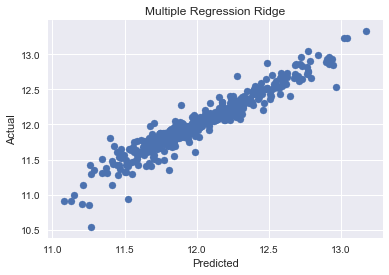

In [161]:
plt.scatter(x=y_predict_multiple_ridge,y=y_test_linear)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiple Regression Ridge')

In [162]:
r2_accuracy_model

{'Linear Regression': 0.8301988312148255,
 'Linear Regression Lasso': 0.9122158386707463,
 'Linear Regression Ridge': 0.9122493509778374}

In [163]:
mse_accuracy_model

{'Linear Regression': -0.026225787388149756,
 'Linear Regression Lasso': -0.01368114203637808,
 'Linear Regression Ridge': -0.013676362647909158}

#### So Based on Linear Models applied so far, we can see Ridge Regression has better results 

## Tree based Models

In [164]:
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()
test_data_tree=test_data.copy()

In [165]:
X_train_tree.head()

,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtCond_Gd,BsmtCond_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_FuseF,Electrical_SBrkr,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,MiscFeature_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1226,86.0,14598,1,6,4,2007,2007,2,0,0,894,894,1,894,1039,0,1933,0,0,2,1,4,1,2,1,2007.0,0,3,2,100,18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
520,60.0,10800,0,4,6,1900,2000,3,0,0,0,0,0,694,600,0,1294,0,0,2,0,3,2,3,0,0.0,1,0,0,220,114,210,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0

## Checking Using Random Forest which features to keep from above features

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


In [167]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=500,random_state=0))
sel_.fit(X_train_tree, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [168]:
selected_features=list(X_train_tree.columns[(sel_.get_support())])
#get_support will select all feature having importance greater then the mean importance
len(selected_features)

17

In [169]:
X_train_tree=X_train_tree[selected_features]
X_test_tree=X_test_tree[selected_features]

In [170]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=0))
sel_.fit(X_train_tree, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

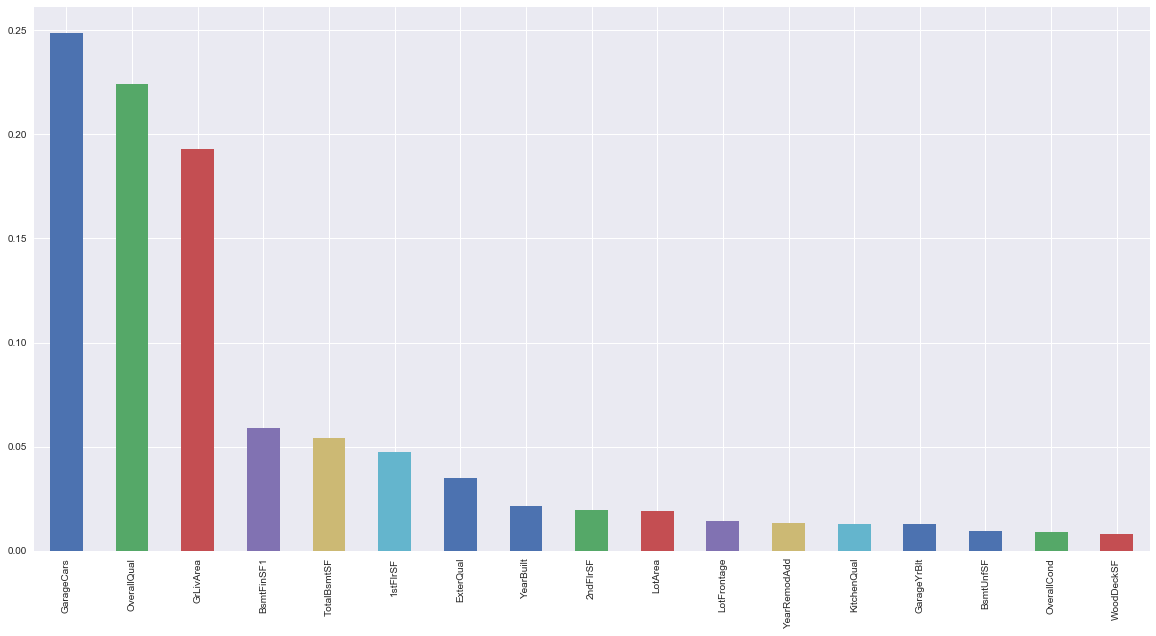

In [171]:
importance=pd.Series(sel_.estimator_.feature_importances_)
importance.index = X_train_tree.columns
importance.sort_values(ascending=False).plot.bar(figsize=(20, 10))

## Decision Tree

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model_decision = DecisionTreeRegressor(random_state = 0)
model_decision.fit(X_train_tree,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [173]:
predicted_decision_train = model_decision.predict(X_train_tree)
print('r2 Train:', r2_score(y_train, predicted_decision_train))
predicted_decision_test = model_decision.predict(X_test_tree)
print('r2 Test:', r2_score(y_test, predicted_decision_test))

r2 Train: 0.9999955176015507
r2 Test: 0.7248956699912894


It looks like tree is overfitting, lets  us reduce depth and check 

#### Paramter Tuning using GridSearchCV

In [174]:
model_decision_params = [{'max_depth': [5, 10],
                            'min_samples_split': [2, 3, 5, 8],
                            'max_features': ['auto', 'sqrt', 'log2']
                         }]

grid_search_decision = GridSearchCV(estimator = model_decision, param_grid = model_decision_params, n_jobs = -1, cv = 10, 
                                 scoring='r2').fit(X_train_tree, y_train)
model_decision = grid_search_decision.best_estimator_
model_decision

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [175]:
grid_search_decision.best_score_

0.7794290556490464

#### 10 fold cross validation

In [176]:
accuracy_r2_decision=cross_val_score(model_decision,X_train_tree,y_train,cv=10,scoring='r2')
accuracy_mse_decision = cross_val_score(model_decision,X_train_tree,y_train,cv=10,scoring='neg_mean_squared_error')

In [177]:
print("Mean of Rsquared: ", accuracy_r2_decision.mean())
print("Standard deviation of Rsquared: ",accuracy_r2_decision.std())
print("-----------------------")
print("Mean of MSE: ",accuracy_mse_decision.mean())
print("Standard deviation of MSE: ",accuracy_mse_decision.std())


Mean of Rsquared:  0.7793326192492579
Standard deviation of Rsquared:  0.04520898336314787
-----------------------
Mean of MSE:  -1317759811.3955963
Standard deviation of MSE:  407607639.6674444


#### Saving Rsquared and mse obtained from cross validation

In [178]:
r2_accuracy_model['Decision Tree']=accuracy_r2_decision.mean()
mse_accuracy_model['Decision Tree']=accuracy_mse_decision.mean()

In [179]:
def R2_and_MSE_tree(model,X_test_data,y_actual):
    """
    Returns - rsquared of actual values, mse of actual values, predicted values
    """
    y_pred=model.predict(X_test_data)
    r2_actual = r2_score(y_actual,y_pred)
    
    print("R_squared: ",r2_actual)
    print('--------------------------------')
    
    
    mse_actual=mean_squared_error(y_actual,y_pred)
    
    print("mse: ",mse_actual)
    return r2_actual,mse_actual,y_pred


In [180]:
#Calculate R2 and MSE for X_test
R_squared_actual_decision_tree,MSE_actual_decision_tree,y_predict_decision_tree= R2_and_MSE_tree(model_decision,X_test_tree,y_test)

R_squared:  0.7550801082842846
--------------------------------
mse:  1634166123.231401


#### Plot of Actual vs Predicted

Text(0.5,1,'Decision Tree')

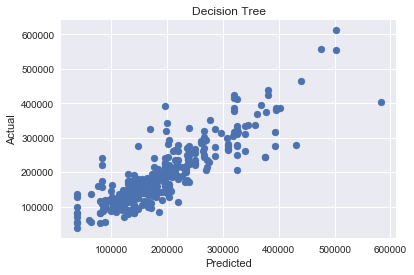

In [181]:
plt.scatter(x=y_predict_decision_tree,y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree')

## Random Forest

In [182]:
from sklearn.ensemble import RandomForestRegressor

In [183]:
model_rf = RandomForestRegressor(random_state = 0)
model_rf.fit(X_train_tree,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [184]:
predicted_rf_train = model_rf.predict(X_train_tree)
print('r2 Train:', r2_score(y_train, predicted_rf_train))
predicted_rf_test = model_rf.predict(X_test_tree)
print('r2 Test:', r2_score(y_test, predicted_rf_test))

r2 Train: 0.9732137202629054
r2 Test: 0.8886187310298634


#### Parameter Tuning using GridSearchCV

In [185]:
model_rf = RandomForestRegressor(random_state = 0)
model_rf_param = [{
                    'n_estimators': [10,20,50,100],'max_depth':[5,10,15,20],
                    'min_samples_split': [2, 3, 5, 8],
                    'max_features': ['auto', 'sqrt','log2']
                 }]

grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = model_rf_param, n_jobs = -1, cv = 10, 
                                 scoring='r2').fit(X_train_tree, y_train)
model_rf = grid_search_rf.best_estimator_
model_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [186]:
grid_search_rf.best_score_

0.8821535068044506

In [187]:
accuracy_r2_random_forest = cross_val_score(model_rf,X_train_tree,y_train,cv=10,scoring='r2')
accuracy_mse_random_forest = cross_val_score(model_rf,X_train_tree,y_train,cv=10,scoring='neg_mean_squared_error')

In [188]:
print("Mean of Rsquared: ", accuracy_r2_random_forest.mean())
print("Standard deviation of Rsquared: ",accuracy_r2_random_forest.std())
print("-----------------------")
print("Mean of MSE: ",accuracy_mse_random_forest.mean())
print("Standard deviation of MSE: ",accuracy_mse_random_forest.std())


Mean of Rsquared:  0.882169861675355
Standard deviation of Rsquared:  0.020406655587200263
-----------------------
Mean of MSE:  -736617954.6743662
Standard deviation of MSE:  310993192.6640433


#### Saving Rsquared and mse obtained from cross validation

In [189]:
r2_accuracy_model['Random Forest']=accuracy_r2_random_forest.mean()
mse_accuracy_model['Random Forest']=accuracy_mse_random_forest.mean()

In [190]:
#Calculate R Squared and MSE for X_test,
R_squared_actual_random_forest,MSE_actual_random_forest,y_predict_random_forest=R2_and_MSE_tree(model_rf,X_test_tree,y_test)



R_squared:  0.8961866688606698
--------------------------------
mse:  692668234.0877886


#### Plot of Actual vs Predicted

Text(0.5,1,'Random Forest')

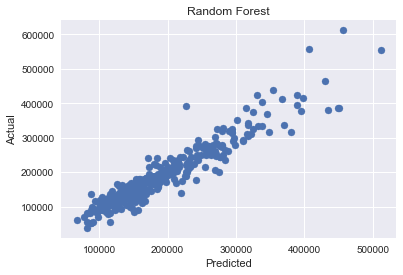

In [191]:
plt.scatter(x=y_predict_random_forest,y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest')

## GradientBoosting

In [192]:
from sklearn.ensemble import GradientBoostingRegressor


In [193]:
model_gbm = GradientBoostingRegressor(random_state=0)
model_gbm.fit(X_train_tree,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [194]:
predicted_gbm_train = model_gbm.predict(X_train_tree)
print('r2 Train:', r2_score(y_train, predicted_gbm_train))
predicted_gbm_test = model_gbm.predict(X_test_tree)
print('r2 Test:', r2_score(y_test, predicted_gbm_test))

r2 Train: 0.9671793507438142
r2 Test: 0.8980661401383554


#### Parameter Tuning using GridSearchCV

In [195]:
model_gbm = GradientBoostingRegressor(random_state = 0)
model_gbm_param = [{
                    'n_estimators': [10,20,50,100,200],'max_depth':[3,5,7],
                    'min_samples_split': [2, 3, 5, 8],
                    'learning_rate':[0.1,0.2,0.3,0.4],
                    'max_features': ['auto', 'sqrt','log2']
                 }]

grid_search_gbm = GridSearchCV(estimator = model_gbm, param_grid = model_gbm_param, n_jobs = -1, cv = 10, 
                                 scoring='r2').fit(X_train_tree, y_train)
model_gbm = grid_search_gbm.best_estimator_
model_gbm

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [196]:
accuracy_r2_gbm = cross_val_score(model_gbm,X_train_tree,y_train,cv=10,scoring='r2')
accuracy_mse_gbm = cross_val_score(model_gbm,X_train_tree,y_train,cv=10,scoring='neg_mean_squared_error')

In [197]:
print("Mean of Rsquared: ", accuracy_r2_gbm.mean())
print("Standard deviation of Rsquared: ",accuracy_r2_gbm.std())
print("-----------------------")
print("Mean of MSE: ",accuracy_mse_gbm.mean())
print("Standard deviation of MSE: ",accuracy_mse_gbm.std())


Mean of Rsquared:  0.9031694023727607
Standard deviation of Rsquared:  0.01942735486537871
-----------------------
Mean of MSE:  -579832568.5091715
Standard deviation of MSE:  171516062.64520633


#### Saving Rsquared and mse obtained from cross validation

In [198]:
r2_accuracy_model['Gradient Boosting']=accuracy_r2_gbm.mean()
mse_accuracy_model['Gradient Boosting']=accuracy_mse_gbm.mean()

In [199]:
#Calculate R Squared and MSE for X_test,
R_squared_actual_gbm,MSE_actual_gbm,y_predict_gbm=R2_and_MSE_tree(model_gbm,X_test_tree,y_test)


R_squared:  0.9012617521799676
--------------------------------
mse:  658806022.3463272


#### Plot of Actual vs Predicted

Text(0.5,1,'Gradient Boosting')

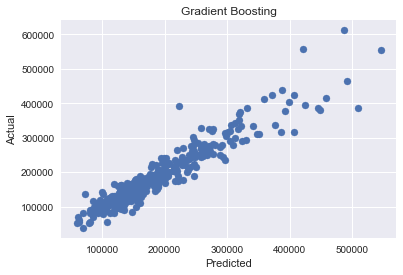

In [200]:
plt.scatter(x=y_predict_gbm,y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting')

## XGBoost

In [201]:
import xgboost as xgb


In [202]:
model_xgb=xgb.XGBRegressor(random_state=0)
model_xgb.fit(X_train_tree,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [203]:
predicted_xgb_train = model_xgb.predict(X_train_tree)
print('r2 Train:', r2_score(y_train, predicted_xgb_train))
predicted_xgb_test = model_xgb.predict(X_test_tree)
print('r2 Test:', r2_score(y_test, predicted_xgb_test))

r2 Train: 0.9639251961801332
r2 Test: 0.896073499250156


#### Parameter Tuning Using GridSearchCV

In [204]:
model_xgb = xgb.XGBRegressor(random_state = 0)
model_xgb_param = [{
                    'n_estimators': [10,20,50,100,200,300,500],'max_depth':[3,4,5,10,15,20],
                    'random_state':[0]
                 }]

grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = model_xgb_param, n_jobs = -1, cv = 10, 
                                 scoring='r2').fit(X_train_tree, y_train)
model_xgb = grid_search_xgb.best_estimator_
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [205]:
grid_search_xgb.best_score_

0.8925482075495953

In [206]:
accuracy_r2_xgb = cross_val_score(model_xgb,X_train_tree,y_train,cv=10,scoring='r2')
accuracy_mse_xgb = cross_val_score(model_xgb,X_train_tree,y_train,cv=10,scoring='neg_mean_squared_error')

In [207]:
print("Mean of Rsquared: ", accuracy_r2_xgb.mean())
print("Standard deviation of Rsquared: ",accuracy_r2_xgb.std())
print("-----------------------")
print("Mean of MSE: ",accuracy_mse_xgb.mean())
print("Standard deviation of MSE: ",accuracy_mse_xgb.std())


Mean of Rsquared:  0.8925402673452656
Standard deviation of Rsquared:  0.022319264501490653
-----------------------
Mean of MSE:  -643398482.9066458
Standard deviation of MSE:  175159349.2955397


#### Saving Rsquared and mse obtained from cross validation

In [208]:
r2_accuracy_model['XGBoost']=accuracy_r2_xgb.mean()
mse_accuracy_model['XGBoost']=accuracy_mse_xgb.mean()

In [209]:
#Calculate R Squared and MSE for X_test,
R_squared_actual_xgb,MSE_actual_xgb,y_predict_xgb=R2_and_MSE_tree(model_xgb,X_test_tree,y_test)


R_squared:  0.8954208119653915
--------------------------------
mse:  697778220.8052398


#### Plot of Actual vs Predicted

Text(0.5,1,'XGBoost')

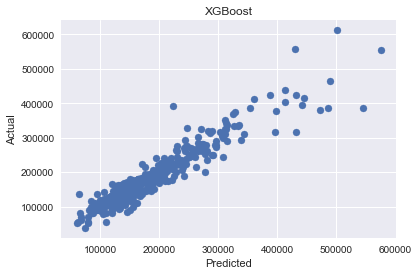

In [210]:
plt.scatter(x=y_predict_xgb,y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost')

In [211]:
r2_accuracy_model

{'Decision Tree': 0.7793326192492579,
 'Gradient Boosting': 0.9031694023727607,
 'Linear Regression': 0.8301988312148255,
 'Linear Regression Lasso': 0.9122158386707463,
 'Linear Regression Ridge': 0.9122493509778374,
 'Random Forest': 0.882169861675355,
 'XGBoost': 0.8925402673452656}

In [212]:
mse_accuracy_model

{'Decision Tree': -1317759811.3955963,
 'Gradient Boosting': -579832568.5091715,
 'Linear Regression': -0.026225787388149756,
 'Linear Regression Lasso': -0.01368114203637808,
 'Linear Regression Ridge': -0.013676362647909158,
 'Random Forest': -736617954.6743662,
 'XGBoost': -643398482.9066458}

#### Based on Above results  Ridge Regression applied on parameter obtained from Lasso performs better. 

For Tree based model we will choose Gradient Boosting and for linear models we will used Ridge Regression along with Lasso for feature selection

#### Prediction using Ridge Regression

In [213]:
test_data_temp=test_data_linear[selected_features_lasso]
y_final_predicted_ridge=np.exp(linear_model_ridge.predict(test_data_temp))


In [214]:
d={'Id':Id,'SalePrice':y_final_predicted_ridge}
output=pd.DataFrame(d)

In [215]:
output.to_csv("Output_Ridge.csv",index=False)

#### Prediction using Gradient Boosting

In [216]:
test_data_temp=test_data_tree[selected_features]
y_final_predicted_gbm=model_gbm.predict(test_data_temp)

In [217]:
d={'Id':Id,'SalePrice':y_final_predicted_gbm}
output=pd.DataFrame(d)

In [218]:
output.to_csv("Output_GBM.csv",index=False)